In [38]:
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

In [40]:
genes <- read_parquet('/gstock/EXOTIC/data/GENOMICS/TMP/refseq_pc_genes_Rdata.parquet')
head(genes)

NC,RefSeq_validation,Region_type,Start,End,Score,Strand,Phase,Attributes,Gene,Length,Miso_siso
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
NC_000001.10,BestRefSeq,gene,69091,70008,.,+,.,"ID=gene-OR4F5;Dbxref=GeneID:79501,HGNC:HGNC:14825;Name=OR4F5;description=olfactory receptor family 4 subfamily F member 5;gbkey=Gene;gene=OR4F5;gene_biotype=protein_coding",OR4F5,0.917,Siso
NC_000001.10,BestRefSeq,gene,367659,368597,.,+,.,"ID=gene-OR4F29;Dbxref=GeneID:729759,HGNC:HGNC:31275;Name=OR4F29;description=olfactory receptor family 4 subfamily F member 29;gbkey=Gene;gene=OR4F29;gene_biotype=protein_coding;gene_synonym=OR7-21",OR4F29,0.938,Siso
NC_000001.10,BestRefSeq,gene,621096,622034,.,-,.,"ID=gene-OR4F16;Dbxref=GeneID:81399,HGNC:HGNC:15079;Name=OR4F16;description=olfactory receptor family 4 subfamily F member 16;gbkey=Gene;gene=OR4F16;gene_biotype=protein_coding;gene_synonym=OR1-1,OR7-21",OR4F16,0.938,Siso
NC_000001.10,BestRefSeq,gene,861111,879954,.,+,.,"ID=gene-SAMD11;Dbxref=GeneID:148398,HGNC:HGNC:28706,MIM:616765;Name=SAMD11;description=sterile alpha motif domain containing 11;gbkey=Gene;gene=SAMD11;gene_biotype=protein_coding;gene_synonym=MRS",SAMD11,18.843,Siso
NC_000001.10,BestRefSeq,gene,879583,894636,.,-,.,"ID=gene-NOC2L;Dbxref=GeneID:26155,HGNC:HGNC:24517,MIM:610770;Name=NOC2L;description=NOC2 like nucleolar associated transcriptional repressor;gbkey=Gene;gene=NOC2L;gene_biotype=protein_coding;gene_synonym=NET15,NET7,NIR,PPP1R112",NOC2L,15.053,Siso
NC_000001.10,BestRefSeq,gene,895964,901099,.,+,.,"ID=gene-KLHL17;Dbxref=GeneID:339451,HGNC:HGNC:24023;Name=KLHL17;description=kelch like family member 17;gbkey=Gene;gene=KLHL17;gene_biotype=protein_coding",KLHL17,5.135,Siso


In [48]:
install.packages("ggsignif")


In [54]:
library(ggsignif)
ggplot(genes, aes(x=Miso_siso, y=Length, fill=Miso_siso)) +
    geom_boxplot(varwidth = FALSE, alpha=0.2, outlier.shape = NA) +
    theme(legend.position="none") + ylim(0, 150) + 

    geom_signif(
        comparisons = list(c("Miso", "Siso")),
        map_signif_level = TRUE, textsize = 6
      )

Warning message:
“package ‘ggsignif’ was built under R version 4.0.5”
Warning message in FUN(X[[i]], ...):
“restarting interrupted promise evaluation”
Warning message in FUN(X[[i]], ...):
“internal error -3 in R_decompress1”


ERROR: Error in FUN(X[[i]], ...): lazy-load database '/enadisk/maison/sage2016/weber/.conda/envs/R_env/lib/R/library/ggsignif/R/ggsignif.rdb' is corrupt


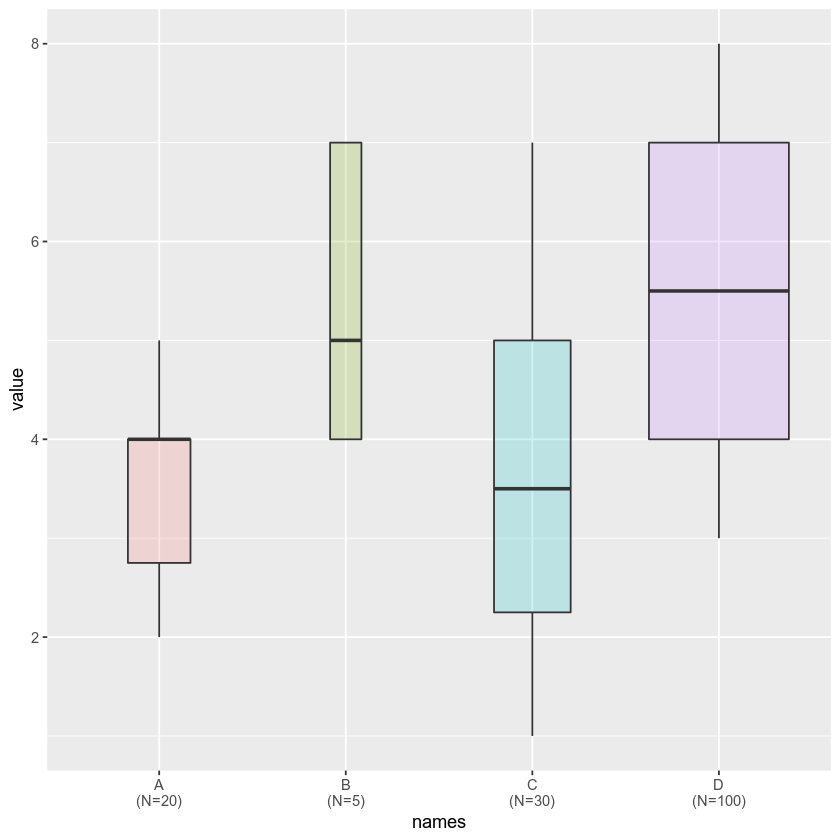

In [13]:
# library
library(ggplot2)
 
# create data
names <- c(rep("A", 20) , rep("B", 5) , rep("C", 30), rep("D", 100))
value <- c( sample(2:5, 20 , replace=T) , sample(4:10, 5 , replace=T), sample(1:7, 30 , replace=T), sample(3:8, 100 , replace=T) )
data <- data.frame(names,value)


# prepare a special xlab with the number of obs for each group
my_xlab <- paste(unique(data$names),"\n(N=",table(data$names),")",sep="")

# plot
ggplot(data, aes(x=names, y=value, fill=names)) +
    geom_boxplot(varwidth = TRUE, alpha=0.2) +
    theme(legend.position="none") +
    scale_x_discrete(labels=my_xlab)

In [15]:
summary(data$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.500   5.000   4.916   6.000   8.000 

Warning message:
“Ignoring unknown parameters: outlier.shape”
Warning message:
“Removed 16496 rows containing non-finite values (stat_ydensity).”


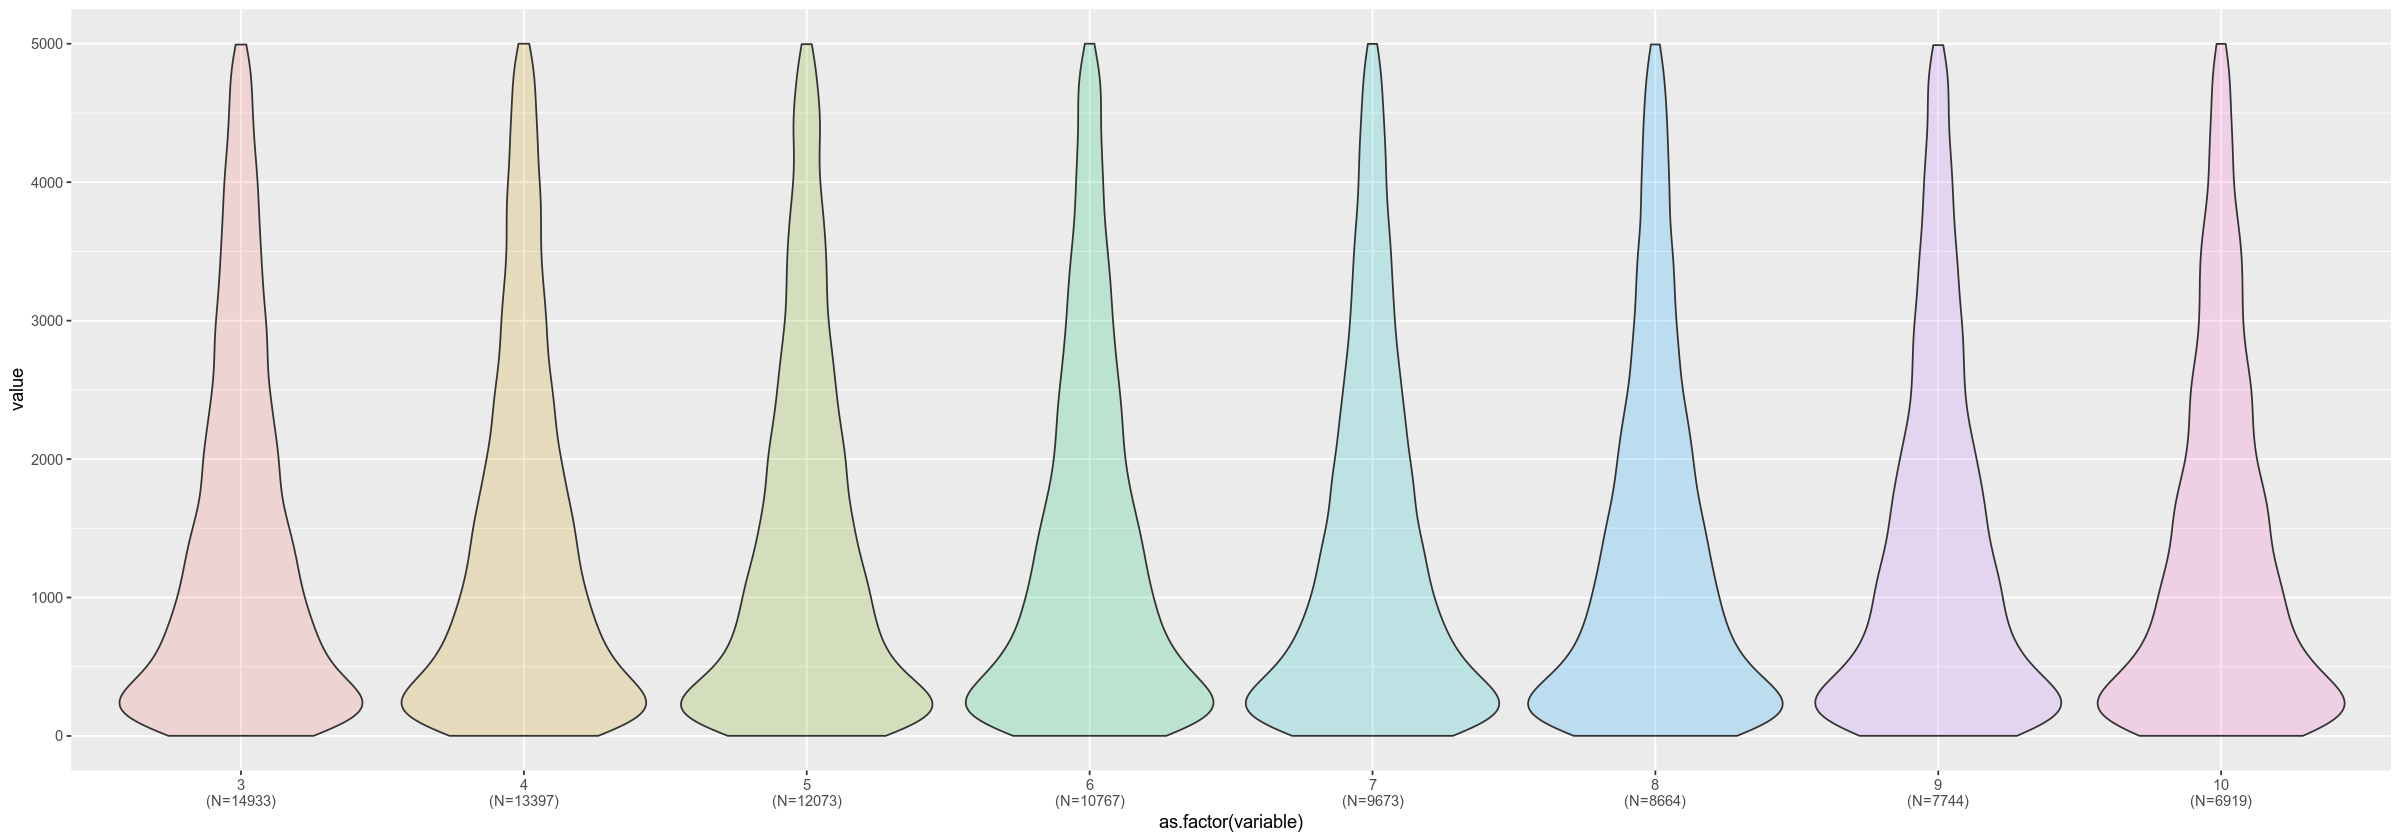

In [3]:
library(arrow)
library(ggplot2)


w = 20
h = 7

options(repr.plot.width=w, repr.plot.height=h)


data = read_parquet('/gstock/EXOTIC/data/GENOMICS/introns_test_distri_r.parquet')
data = data[(data$variable <= 10) & (data$variable > 2), ]
data = data[(data$value > 0) & (data$value < 2e6), ]
# data

# prepare a special xlab with the number of obs for each group
my_xlab <- paste(unique(data$variable),"\n(N=",table(data$variable),")",sep="")



# plot
ggplot(data, aes(x=as.factor(variable), y=value, fill=as.factor(variable))) +
    geom_boxplot(varwidth = TRUE, alpha=0.2, outlier.shape = NA) +
    theme(legend.position="none") +
    scale_x_discrete(labels=my_xlab) + 
    ylim(0,0.5e4)


Warning message:
“Removed 35529 rows containing non-finite values (stat_boxplot).”


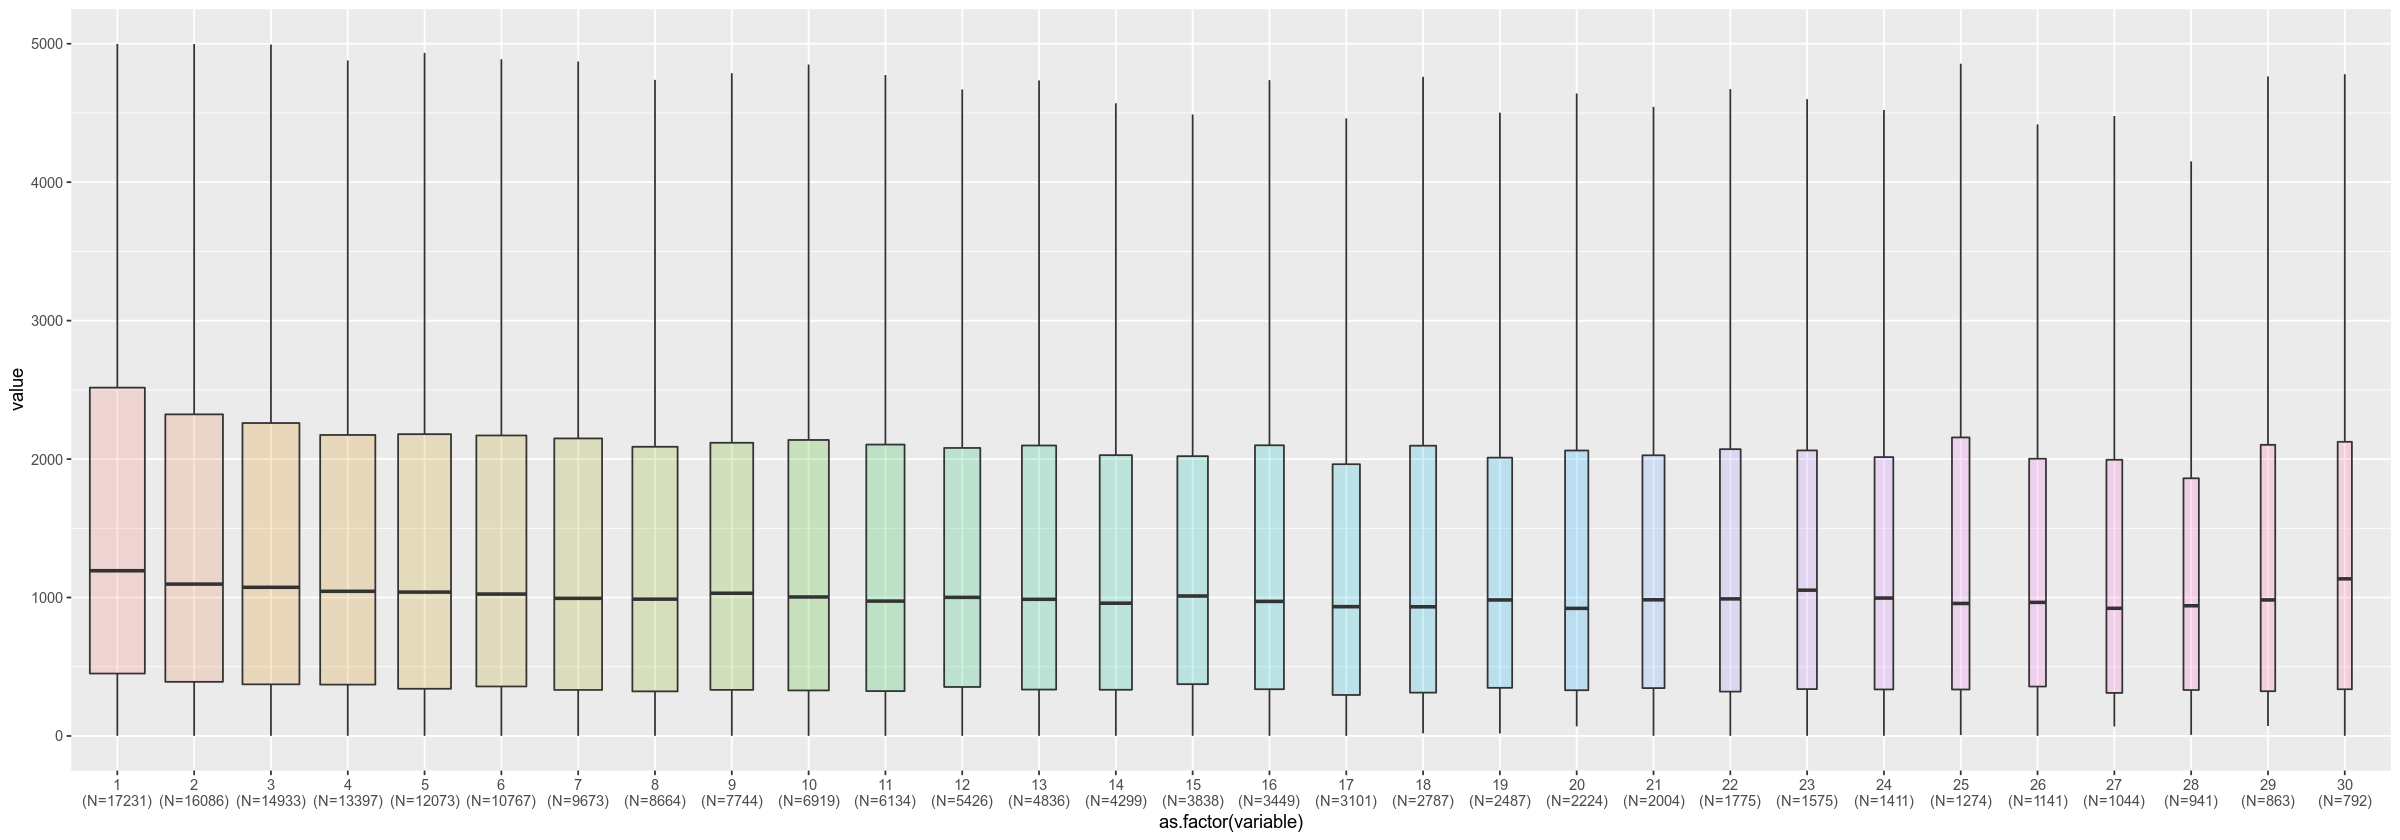

In [26]:
library(arrow)



w = 20
h = 7

options(repr.plot.width=w, repr.plot.height=h)


data = read_parquet('/gstock/EXOTIC/data/GENOMICS/introns_test_distri_r.parquet')
data = data[data$variable <= 30, ]
data = data[(data$value > 0) & (data$value < 2e6), ]
# data

# prepare a special xlab with the number of obs for each group
my_xlab <- paste(unique(data$variable),"\n(N=",table(data$variable),")",sep="")

# plot
ggplot(data, aes(x=as.factor(variable), y=value, fill=as.factor(variable))) +
    geom_boxplot(varwidth = TRUE, alpha=0.2, outlier.shape = NA) +
    theme(legend.position="none") +
    scale_x_discrete(labels=my_xlab) + 
    ylim(0,0.5e4)

raincloud_1_h <- raincloud_1x1(
  data = df_1x1, 
  colors = (c('dodgerblue','darkorange')), 
  fills = (c('dodgerblue','darkorange')), 
  size = 1, 
  alpha = .6, 
  ort = 'h') +

scale_x_continuous(breaks=c(1,2), labels=c("Group1", "Group2"), limits=c(0, 3)) +
  xlab("Groups") + 
  ylab("Score") +
  theme_classic()

raincloud_1_h



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


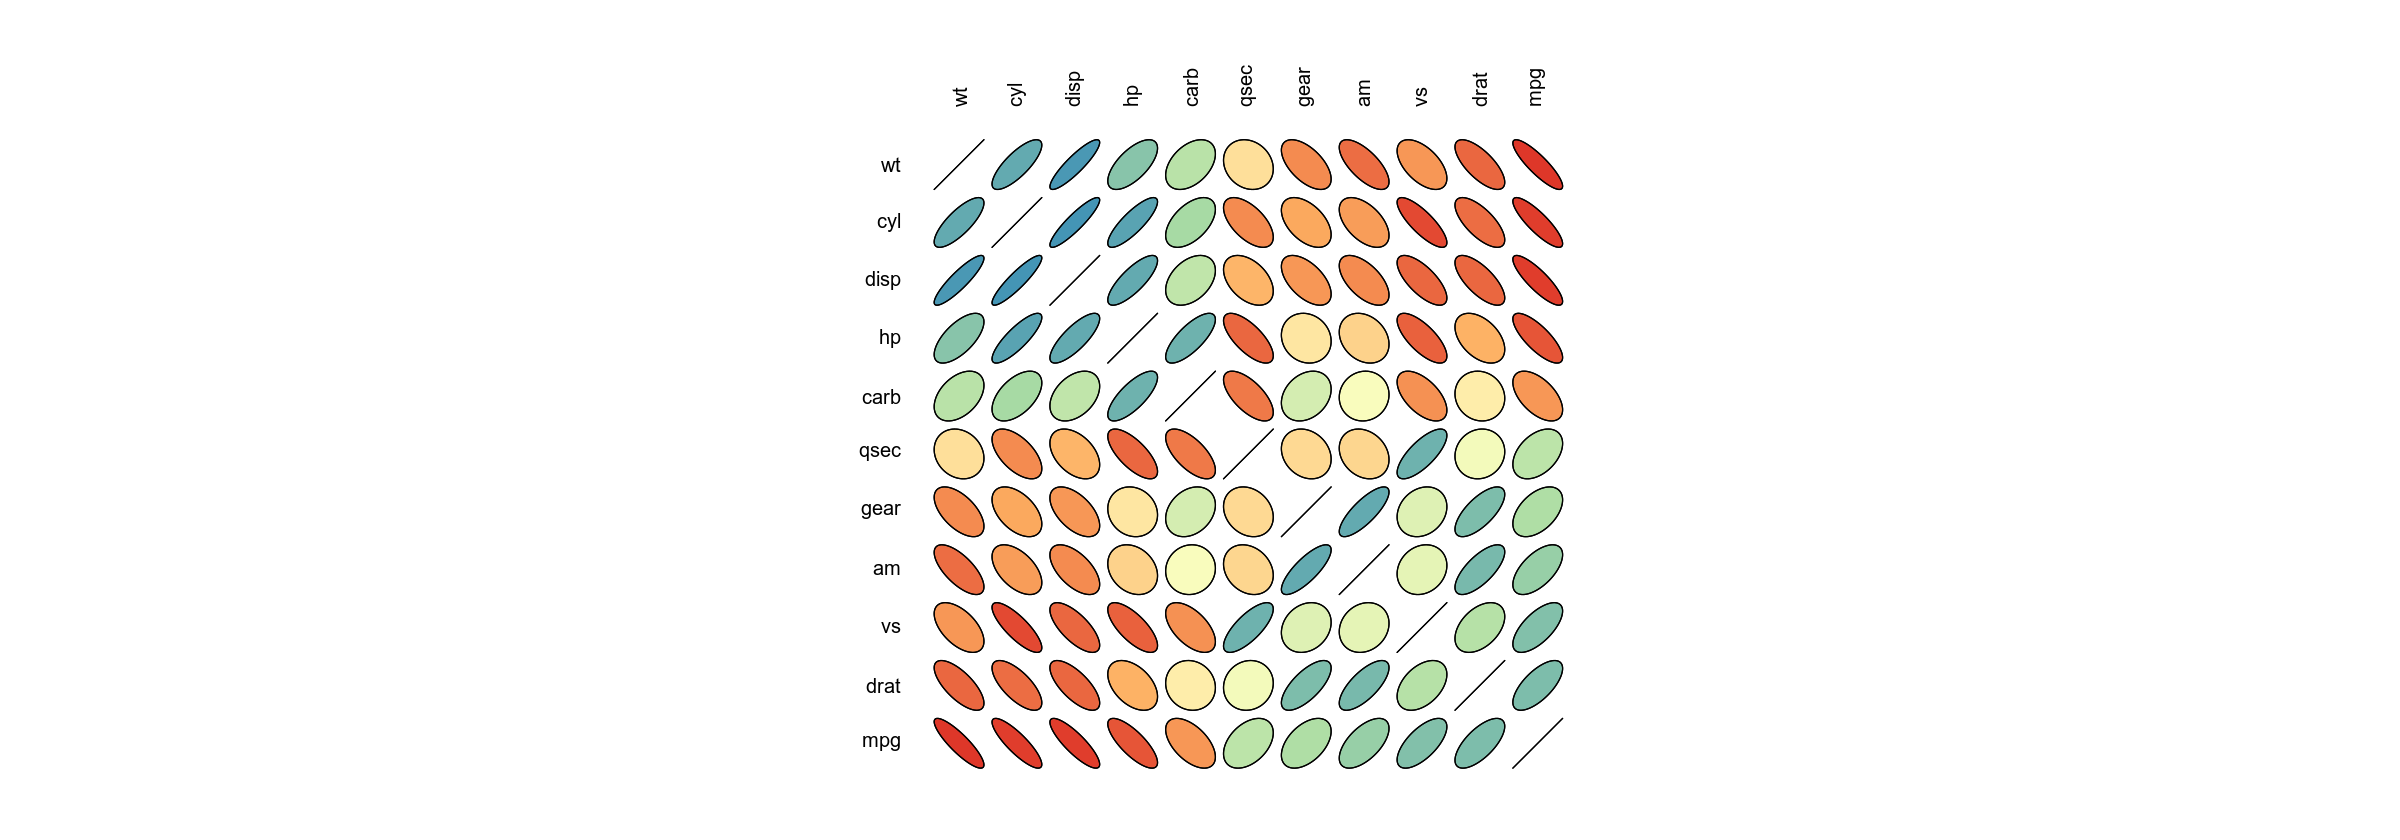

In [32]:
# Libraries
library(ellipse)
library(RColorBrewer)
 
# Use of the mtcars data proposed by R
data <- cor(mtcars)
data
 
# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors <- colorRampPalette(my_colors)(100)
 
# Order the correlation matrix
ord <- order(data[1, ])
data_ord <- data[ord, ord]
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(1,1,1,1)  )

In [45]:
data[(data$Exon_nb == 1) & (data$Miso_siso == 'Siso') & (data$Length_raw > 1000), ]

Gene,Exon_type,ranges,mRNA_exons,Exon_start,Exon_stop,Length,Strand,mRNA_exons_nb,mRNA_gene,⋯,Share,CDS_count,ranges_without_variable,Exon_start_raw,Exon_stop_raw,Length_raw,Miso_siso,Exon_nb,__index_level_0__,__index_level_1__
<chr>,<chr>,<chr>,<list<character>>,<chr>,<chr>,<int>,<int>,<int>,<list<character>>,⋯,<lgl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>
ABHD13,CDS,108881567-108882580,NM_032859,108881567,108882580,1013,1,1,NM_032859,⋯,FALSE,1,108881567-108882580,108881567,108882580,1013,Siso,1,ABHD13,1752
ABHD16B,CDS,62492894-62494303,NM_080622,62492894,62494303,1409,1,1,NM_080622,⋯,FALSE,1,62492894-62494303,62492894,62494303,1409,Siso,1,ABHD16B,1801
ACKR2,CDS,42905995-42907149,NM_001296,42905995,42907149,1154,1,1,NM_001296,⋯,FALSE,1,42905995-42907149,42905995,42907149,1154,Siso,1,ACKR2,2783
ACKR3,CDS,237489109-237490197,NM_020311,237489109,237490197,1088,1,1,NM_020311,⋯,FALSE,1,237489109-237490197,237489109,237490197,1088,Siso,1,ACKR3,2784
ACTBL2,CDS,56777404-56778534,NM_001017992,56777404,56778534,1130,0,1,NM_001017992,⋯,FALSE,1,56777404-56778534,56777404,56778534,1130,Siso,1,ACTBL2,3453
ACTL7A,CDS,111624603-111625910,NM_006687,111624603,111625910,1307,1,1,NM_006687,⋯,FALSE,1,111624603-111625910,111624603,111625910,1307,Siso,1,ACTL7A,3503
ACTL7B,CDS,111616963-111618210,NM_006686,111616963,111618210,1247,0,1,NM_006686,⋯,FALSE,1,111616963-111618210,111616963,111618210,1247,Siso,1,ACTL7B,3504
ACTL9,CDS,8807801-8809051,NM_178525,8807801,8809051,1250,0,1,NM_178525,⋯,FALSE,1,8807801-8809051,8807801,8809051,1250,Siso,1,ACTL9,3507
ACTRT1,CDS,127185055-127186185,NM_138289,127185055,127186185,1130,0,1,NM_138289,⋯,FALSE,1,127185055-127186185,127185055,127186185,1130,Siso,1,ACTRT1,3717


In [43]:
data[(data$Gene == 'TTN'), ]

Gene,Exon_type,ranges,mRNA_exons,Exon_start,Exon_stop,Length,Strand,mRNA_exons_nb,mRNA_gene,⋯,Share,CDS_count,ranges_without_variable,Exon_start_raw,Exon_stop_raw,Length_raw,Miso_siso,Exon_nb,__index_level_0__,__index_level_1__
<chr>,<chr>,<chr>,<list<character>>,<chr>,<chr>,<int>,<int>,<int>,<list<character>>,⋯,<lgl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>
TTN,CDS,179669279-179669369,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179669279,179669369,90,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179669279-179669369,179669279,179669369,90,Miso,1,TTN,196769
TTN,CDS,179666865-179667068,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179666865,179667068,203,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179666865-179667068,179666865,179667068,203,Miso,2,TTN,196768
TTN,CDS,179665122-179665409,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179665122,179665409,287,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179665122-179665409,179665122,179665409,287,Miso,3,TTN,196767
TTN,CDS,179664552-179664637,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179664552,179664637,85,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179664552-179664637,179664552,179664637,85,Miso,4,TTN,196766
TTN,CDS,179664214-179664458,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179664214,179664458,244,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179664214-179664458,179664214,179664458,244,Miso,5,TTN,196765
TTN,CDS,179659649-179659979,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179659649,179659979,330,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179659649-179659979,179659649,179659979,330,Miso,6,TTN,196764
TTN,CDS,179659126-179659278,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179659126,179659278,152,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179659126-179659278,179659126,179659278,152,Miso,7,TTN,196763
TTN,CDS,179658131-179658268,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179658131,179658268,137,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179658131-179658268,179658131,179658268,137,Miso,8,TTN,196762
TTN,CDS,179656799-179656924,"NM_003319 , NM_133437 , NM_133432 , NM_133378 , NM_001256850, NM_001267550, NM_133379",179656799,179656924,125,0,7,"NM_133379 , NM_133437 , NM_133432 , NM_133378 , NM_003319 , NM_001256850, NM_001267550",⋯,FALSE,363,179656799-179656924,179656799,179656924,125,Miso,9,TTN,196761


In [37]:
summary(data[(data$Exon_nb == 1) & (data$Miso_siso == 'Siso'), ]$Length_raw)
summary(data[(data$Exon_nb == 1) & (data$Miso_siso == 'Miso'), ]$Length_raw)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    74.0   159.0   384.8   476.0 11861.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    50.0    97.0   201.3   188.0  6045.0 

Joining, by = "Miso_siso"

Warning message:
“Removed 7882 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 7882 rows containing non-finite values (stat_boxplot).”
Warning message:
“position_dodge requires non-overlapping x intervals”


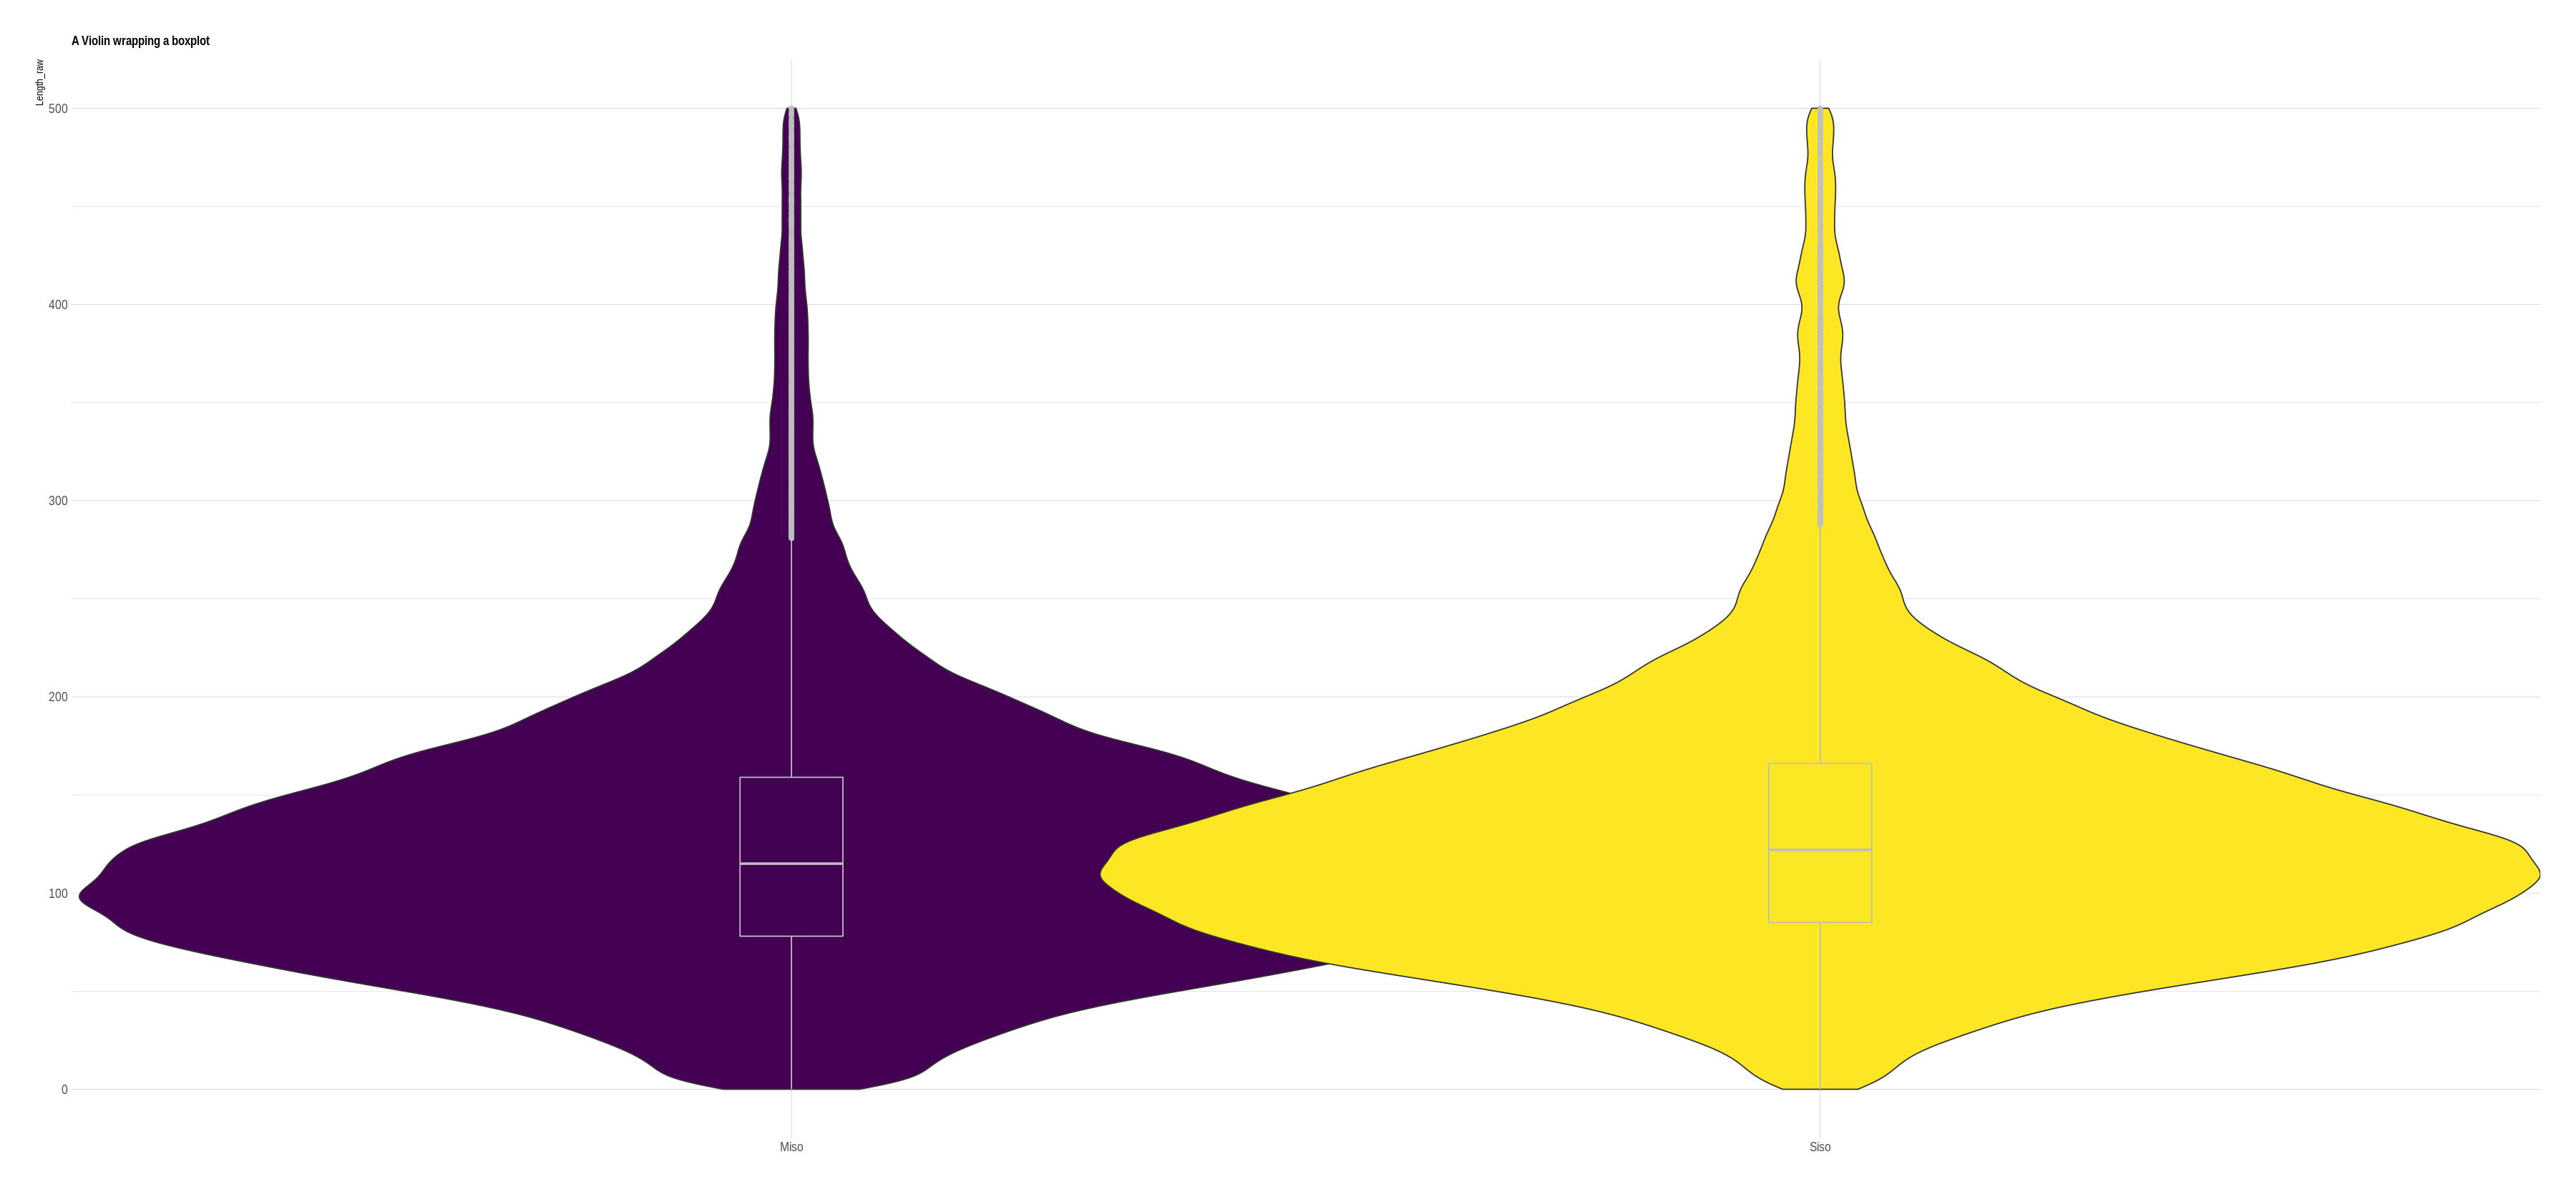

In [76]:
library(arrow)
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(viridis)


w = 30
h = 14

options(repr.plot.width=w, repr.plot.height=h)


data = read_parquet('/gstock/EXOTIC/data/GENOMICS/refseq_wt_variable.parquet')
data = data[data$Exon_nb <= 20, ]

sample_size = data %>% group_by(Miso_siso) %>% summarize(num=n())


data %>%
  left_join(sample_size) %>%
  mutate(myaxis = paste0(Miso_siso, "\n", "n=", num)) %>%
  ggplot( aes(x=Miso_siso, y=Length_raw, fill=Miso_siso)) +
    geom_violin(width=1.4) +
    geom_boxplot(width=0.1, color="grey", alpha=0.2) +
    scale_fill_viridis(discrete = TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A Violin wrapping a boxplot") +
    xlab("") + ylim(0,500)


Warning message:
“Ignoring unknown parameters: varwitdh”
Warning message:
“Removed 7027 rows containing non-finite values (stat_boxplot).”


ERROR: Error in raincloud_1x1(data = df_1x1, colors = (c("dodgerblue", "darkorange")), : could not find function "raincloud_1x1"


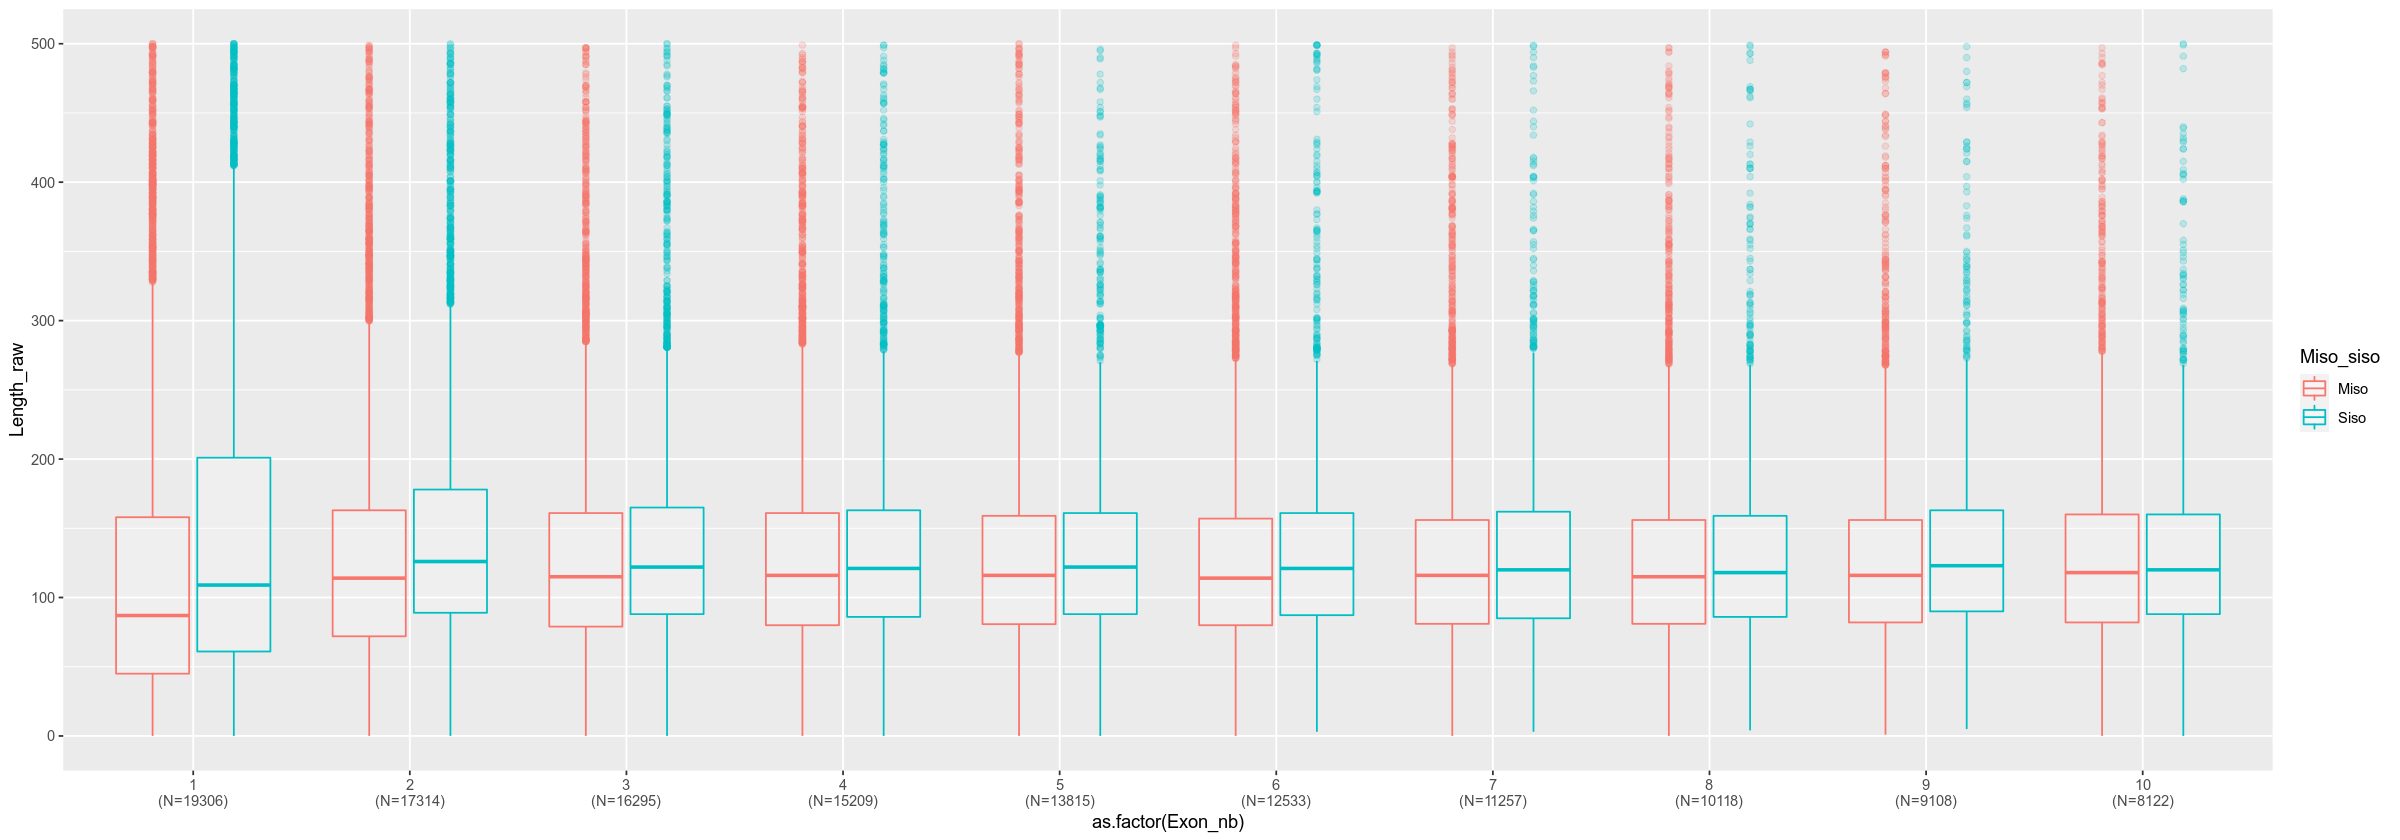

In [78]:
library(arrow)



w = 20
h = 7

options(repr.plot.width=w, repr.plot.height=h)


data = read_parquet('/gstock/EXOTIC/data/GENOMICS/refseq_wt_variable.parquet')
data = data[data$Exon_nb <= 10, ]
# data = data[(data$Length_raw > 0) & (data$Length_raw < 2e6), ]
# data

# prepare a special xlab with the number of obs for each group
my_xlab <- paste(unique(data$Exon_nb),"\n(N=",table(data$Exon_nb),")",sep="")

# plot
ggplot(data, aes(x=as.factor(Exon_nb), y=Length_raw, colour=Miso_siso)) +
    geom_boxplot(varwitdh=TRUE, alpha=0.2) +
    theme() +
    scale_x_discrete(labels=my_xlab) + 
    ylim(0,500)

raincloud_1_h <- raincloud_1x1(
  data = df_1x1, 
  colors = (c('dodgerblue','darkorange')), 
  fills = (c('dodgerblue','darkorange')), 
  size = 1, 
  alpha = .6, 
  ort = 'h') +

scale_x_continuous(breaks=c(1,2), labels=c("Group1", "Group2"), limits=c(0, 3)) +
  xlab("Groups") + 
  ylab("Score") +
#   theme_classic() +
#     legend()

raincloud_1_h


Warning message:
“Computation failed in `stat_sample_slabinterval()`:
'x' contains missing values”
Warning message:
“Removed 2751 rows containing non-finite values (geom_dotsinterval).”


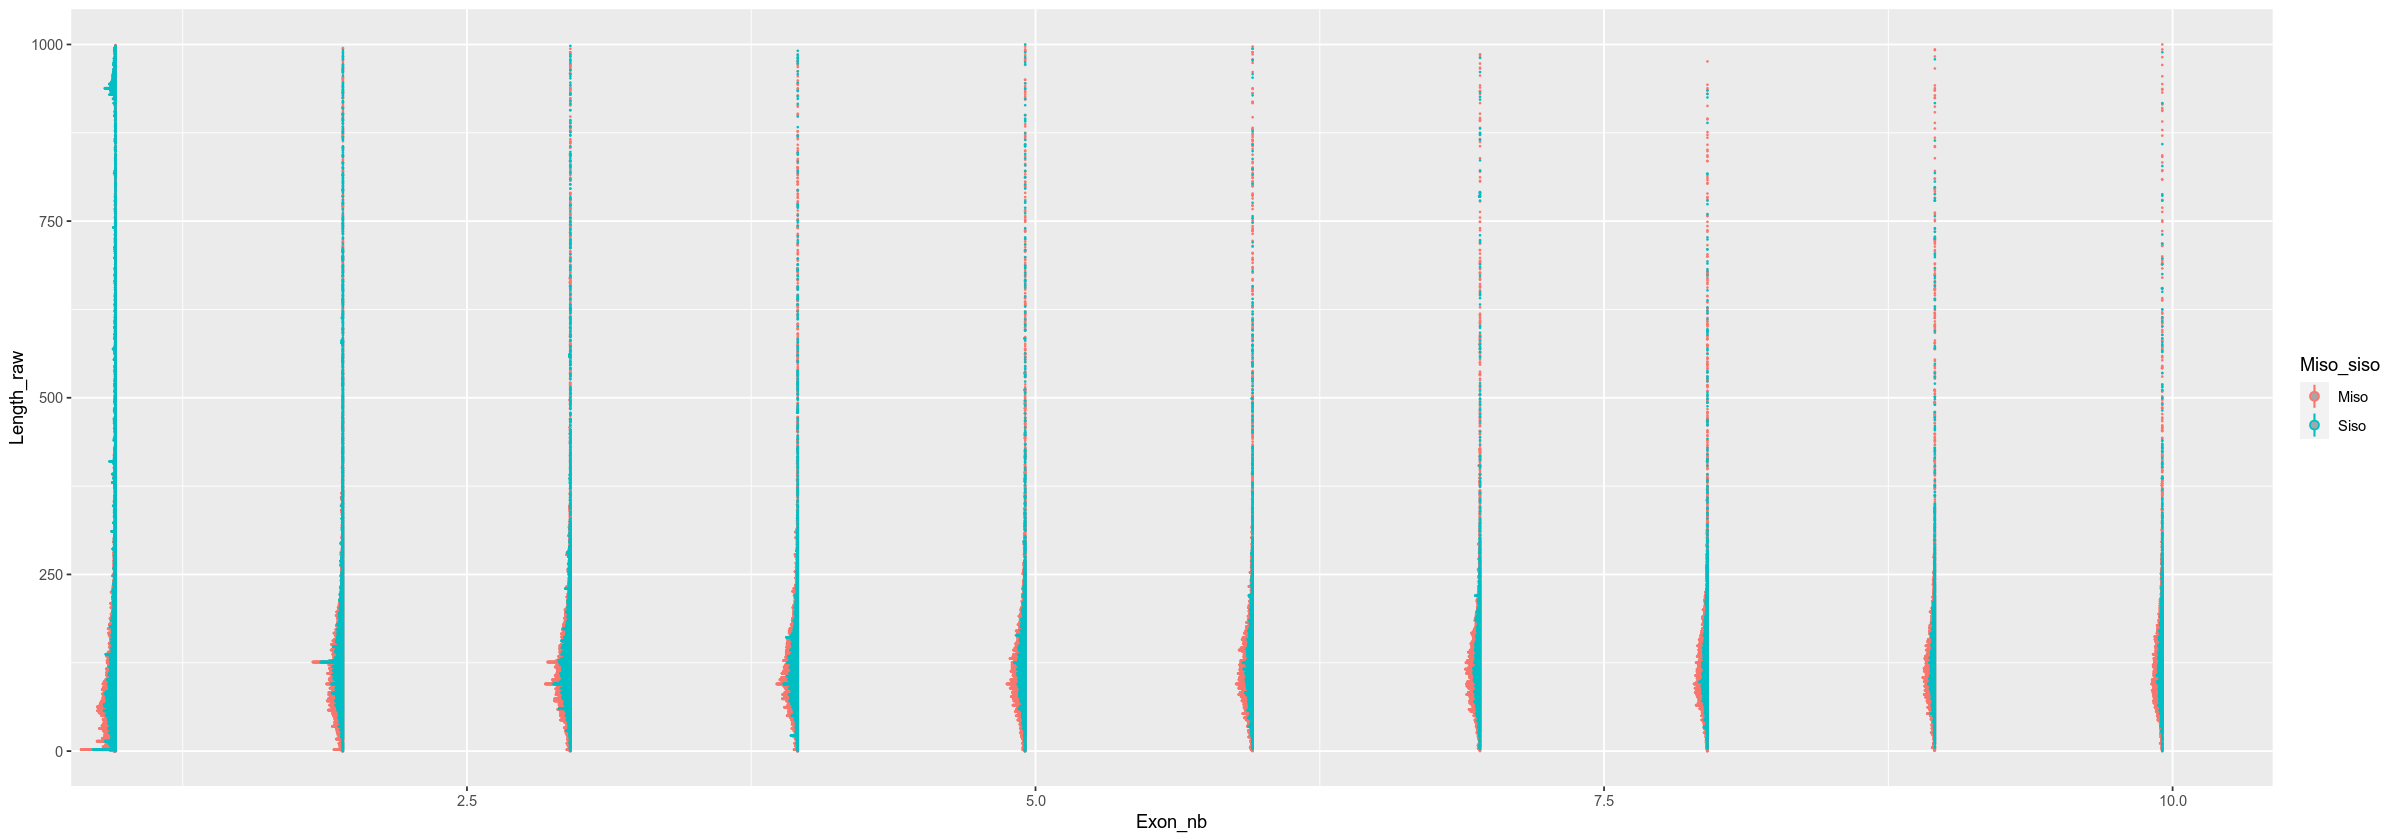

In [21]:
library(arrow)
library(ggdist)


w = 20
h = 7

options(repr.plot.width=w, repr.plot.height=h)


data = read_parquet('/gstock/EXOTIC/data/GENOMICS/refseq_wt_variable.parquet')
data = data[data$Exon_nb <= 10, ]
# data = data[(data$Length_raw > 0) & (data$Length_raw < 2e6), ]
# data

# prepare a special xlab with the number of obs for each group
my_xlab <- paste(unique(data$Exon_nb),"\n(N=",table(data$Exon_nb),")",sep="")

# plot
# ggplot(data, aes(x=as.factor(Exon_nb), y=Length_raw, colour=Miso_siso)) +
ggplot(data, aes(x = Exon_nb, y = Length_raw, colour=Miso_siso)) + 
  ggdist::stat_halfeye(
    adjust = .5,
    width = .6, 
    ## set slab interval to show IQR and 95% data range
    .width = c(.5, .95)
  ) + 
  ggdist::stat_dots(
    side = "left", 
    dotsize = .8, 
    justification = 1.05, 
    binwidth = .3
  ) +
    ylim(0,1000) + 

  coord_cartesian(xlim = c(1.2, NA))

In [25]:
p2 <- ggplot(data = data,
             mapping = aes(x = Exon_nb, y = Length_raw,
                           colour = Miso_siso)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(x = "Weekly Learning Time", y = "Science Scores") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.title = element_blank())

ggMarginal(p2, type = "density", groupColour = TRUE, groupFill = TRUE)

ERROR: Error in ggMarginal(p2, type = "density", groupColour = TRUE, groupFill = TRUE): could not find function "ggMarginal"


In [70]:
install.packages('Hmisc')

Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”


In [82]:
# Libraries
library("lattice")

 
# Use of the mtcars data proposed by R
data <- read_excel('/gstock/EXOTIC/data/CLUSTERING/fold_enrichment.xlsx')
data
 
## Try it out
levelplot(Z ~ X*Y, data=data  ,xlab="X", main="")

ERROR: Error in read_excel("/gstock/EXOTIC/data/CLUSTERING/fold_enrichment.xlsx"): could not find function "read_excel"


In [169]:
library("dplyr")
data = read_excel('/gstock/EXOTIC/data/CLUSTERING/data_profiles_equal.xlsx')
data <-  dplyr::rename_all(data, recode, cluster_new = "Cluster", variable : "Ordinal intron")
data

Condition,Introns_nb,cluster_new,variable,value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Miso,3,2,1,18
Miso,3,0,1,79
Miso,3,1,1,19
Miso,3,3,1,49
Miso,4,3,1,20
Miso,4,2,1,19
Miso,4,0,1,64
Miso,4,1,1,18
Miso,5,0,1,57


In [15]:
library("readxl")
library("ggplot2")
library('ggpubr')
library("dplyr")
data = read_excel('/gstock/EXOTIC/data/CLUSTERING/data_profiles_equal.xlsx')

data = dplyr::rename(data, Cluster = cluster_new, Ordinal_intron = variable)
data$Cluster <- data$Cluster + 1
data

w = 30
h = 14

options(repr.plot.width=w, repr.plot.height=h)

# data['cluster_new'] = data['cluster_new'] + 1 
# data
png("/gstock/EXOTIC/data/CLUSTERING/intron_profiles_R.png", height=h*100, width=w*100)
ggplot(data, aes(x=Introns_nb, y=value)) + 
    geom_bar(stat="identity") + 
    stat_smooth(method = "lm", col = "red") +  
    stat_regline_equation(label.x = 12, label.y = 80) + 
    stat_cor( label.x = 12, label.y = 73) + 
    facet_grid(Cluster ~ Ordinal_intron, labeller=label_both) + 
    theme_light() + 
    theme(text = element_text(size=30)) + 
    labs(y="Intron size (% gene body)", x="Gene group with x introns")

    
dev.off()

Condition,Introns_nb,Cluster,Ordinal_intron,value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Miso,3,3,1,18
Miso,3,1,1,79
Miso,3,2,1,19
Miso,3,4,1,49
Miso,4,4,1,20
Miso,4,3,1,19
Miso,4,1,1,64
Miso,4,2,1,18
Miso,5,1,1,57


`geom_smooth()` using formula 'y ~ x'



png 
  2

In [22]:
data <- as.matrix(mtcars)
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [30]:
data_heatmap$cluster_new

ERROR: Error in data_heatmap$cluster_new: $ operator is invalid for atomic vectors


In [36]:
install.packages('pheatmap')

[1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "2" "2"
[20] "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "3" "3" "3" "3" "3" "3"
[39] "3" "3" "3" "3" "3" "3" "3" "3" "3" "3" "1" "1"

[1] "character"

,1jrqxa,1pskvw,1ojvwz,1uomgt,1kyzed,1rqwul,1lridm,1wpihl,1rmkxl,1uytxn,⋯,3lnoac,3ldxhe,3hkndc,3vmpgr,3gleyd,3zaeuj,3pylbz,3wpnke,1zcskv,1emycf
abv,9.6964789,9.1728114,2.82769465,0.3945351,8.05493505,1.11951605,4.0784887,2.34947601,3.234336980,3.08751076,⋯,2.1361186,5.588495,5.70419918,1.09257478,7.7990376,1.1659532,8.7986738,2.4601971,0.89274929,1.2039410
nft,0.9020955,15.5758530,4.32837563,2.0908362,34.30819707,14.91613146,15.0169446,2.89556051,0.111138775,4.25862485,⋯,1.7794056,6.736263,0.06479878,4.04623329,0.9283425,1.9987516,1.4852043,1.0475209,4.61581615,1.6035810
xha,2.6721643,3.1270386,1.76507723,0.3404244,2.34281204,0.01061616,3.2914756,2.21147567,8.864975557,1.29454958,⋯,3.5296595,2.042586,1.34601058,3.87612513,7.8022620,5.0517733,19.3548347,2.1170316,2.56696751,3.6439616
trb,0.1198261,0.3569485,4.98020608,1.7912319,2.49356024,0.96958736,10.1869030,2.62706765,0.001409228,0.40573403,⋯,14.8269161,1.248637,1.99201619,1.20688042,1.9018044,0.6663384,1.7032902,2.1891364,2.57440831,0.4955929
oar,2.1388712,4.6040106,9.89789599,0.1263967,0.35183153,17.78038504,0.9132281,2.92058047,2.361623168,0.03678388,⋯,10.3826078,1.771322,6.21746290,2.66729645,3.1906684,9.9704630,5.6067982,3.4183142,10.83478419,1.1852822
xes,0.7157639,21.5206301,0.58982644,6.2495455,9.60236140,1.63799450,5.5913323,1.26672337,2.406431778,0.84587373,⋯,2.5903782,4.698681,1.21925307,11.12992229,7.1228712,1.5688450,0.5211563,2.5134432,6.79755858,1.2898926
phn,14.7287483,20.6853421,3.51358057,9.8443597,3.68486186,3.11031907,4.8432983,0.02132416,1.022761478,6.26241381,⋯,9.6551961,3.775484,4.61871717,2.36292415,2.9014772,2.3838534,0.2526567,9.4996881,1.42961362,13.4743104
iyq,2.2831885,5.8990262,10.85900742,1.0998980,0.08164448,1.38199998,0.4174706,9.99900665,0.126450574,20.17515868,⋯,3.6350915,1.326234,1.42086056,5.28784417,9.5580196,0.1569378,2.0213931,3.6537361,0.61669840,0.2307582
yna,0.1345464,0.5908353,3.26290164,5.4101957,2.50022233,5.46546201,7.0050585,7.64421378,6.590940868,0.69368755,⋯,6.1130353,12.212310,1.06519465,2.49413671,1.4212777,11.0565215,6.5851393,6.3619229,17.20714333,6.8551370
qin,11.6734828,1.0232461,0.05367866,6.2259275,8.04611585,6.27357363,2.2417401,2.20459775,8.838824755,3.88180000,⋯,2.6470086,4.446021,5.05485483,0.06826855,0.8973322,9.5275291,7.3009024,5.2187305,1.48059256,18.5689485


,group
,<chr>
1jrqxa,1
1pskvw,1
1ojvwz,1
1uomgt,1
1kyzed,1
1rqwul,1
1lridm,1
1wpihl,1
1rmkxl,1


$group
        1         2         3 
"#E41A1C" "#377EB8" "#4DAF4A"

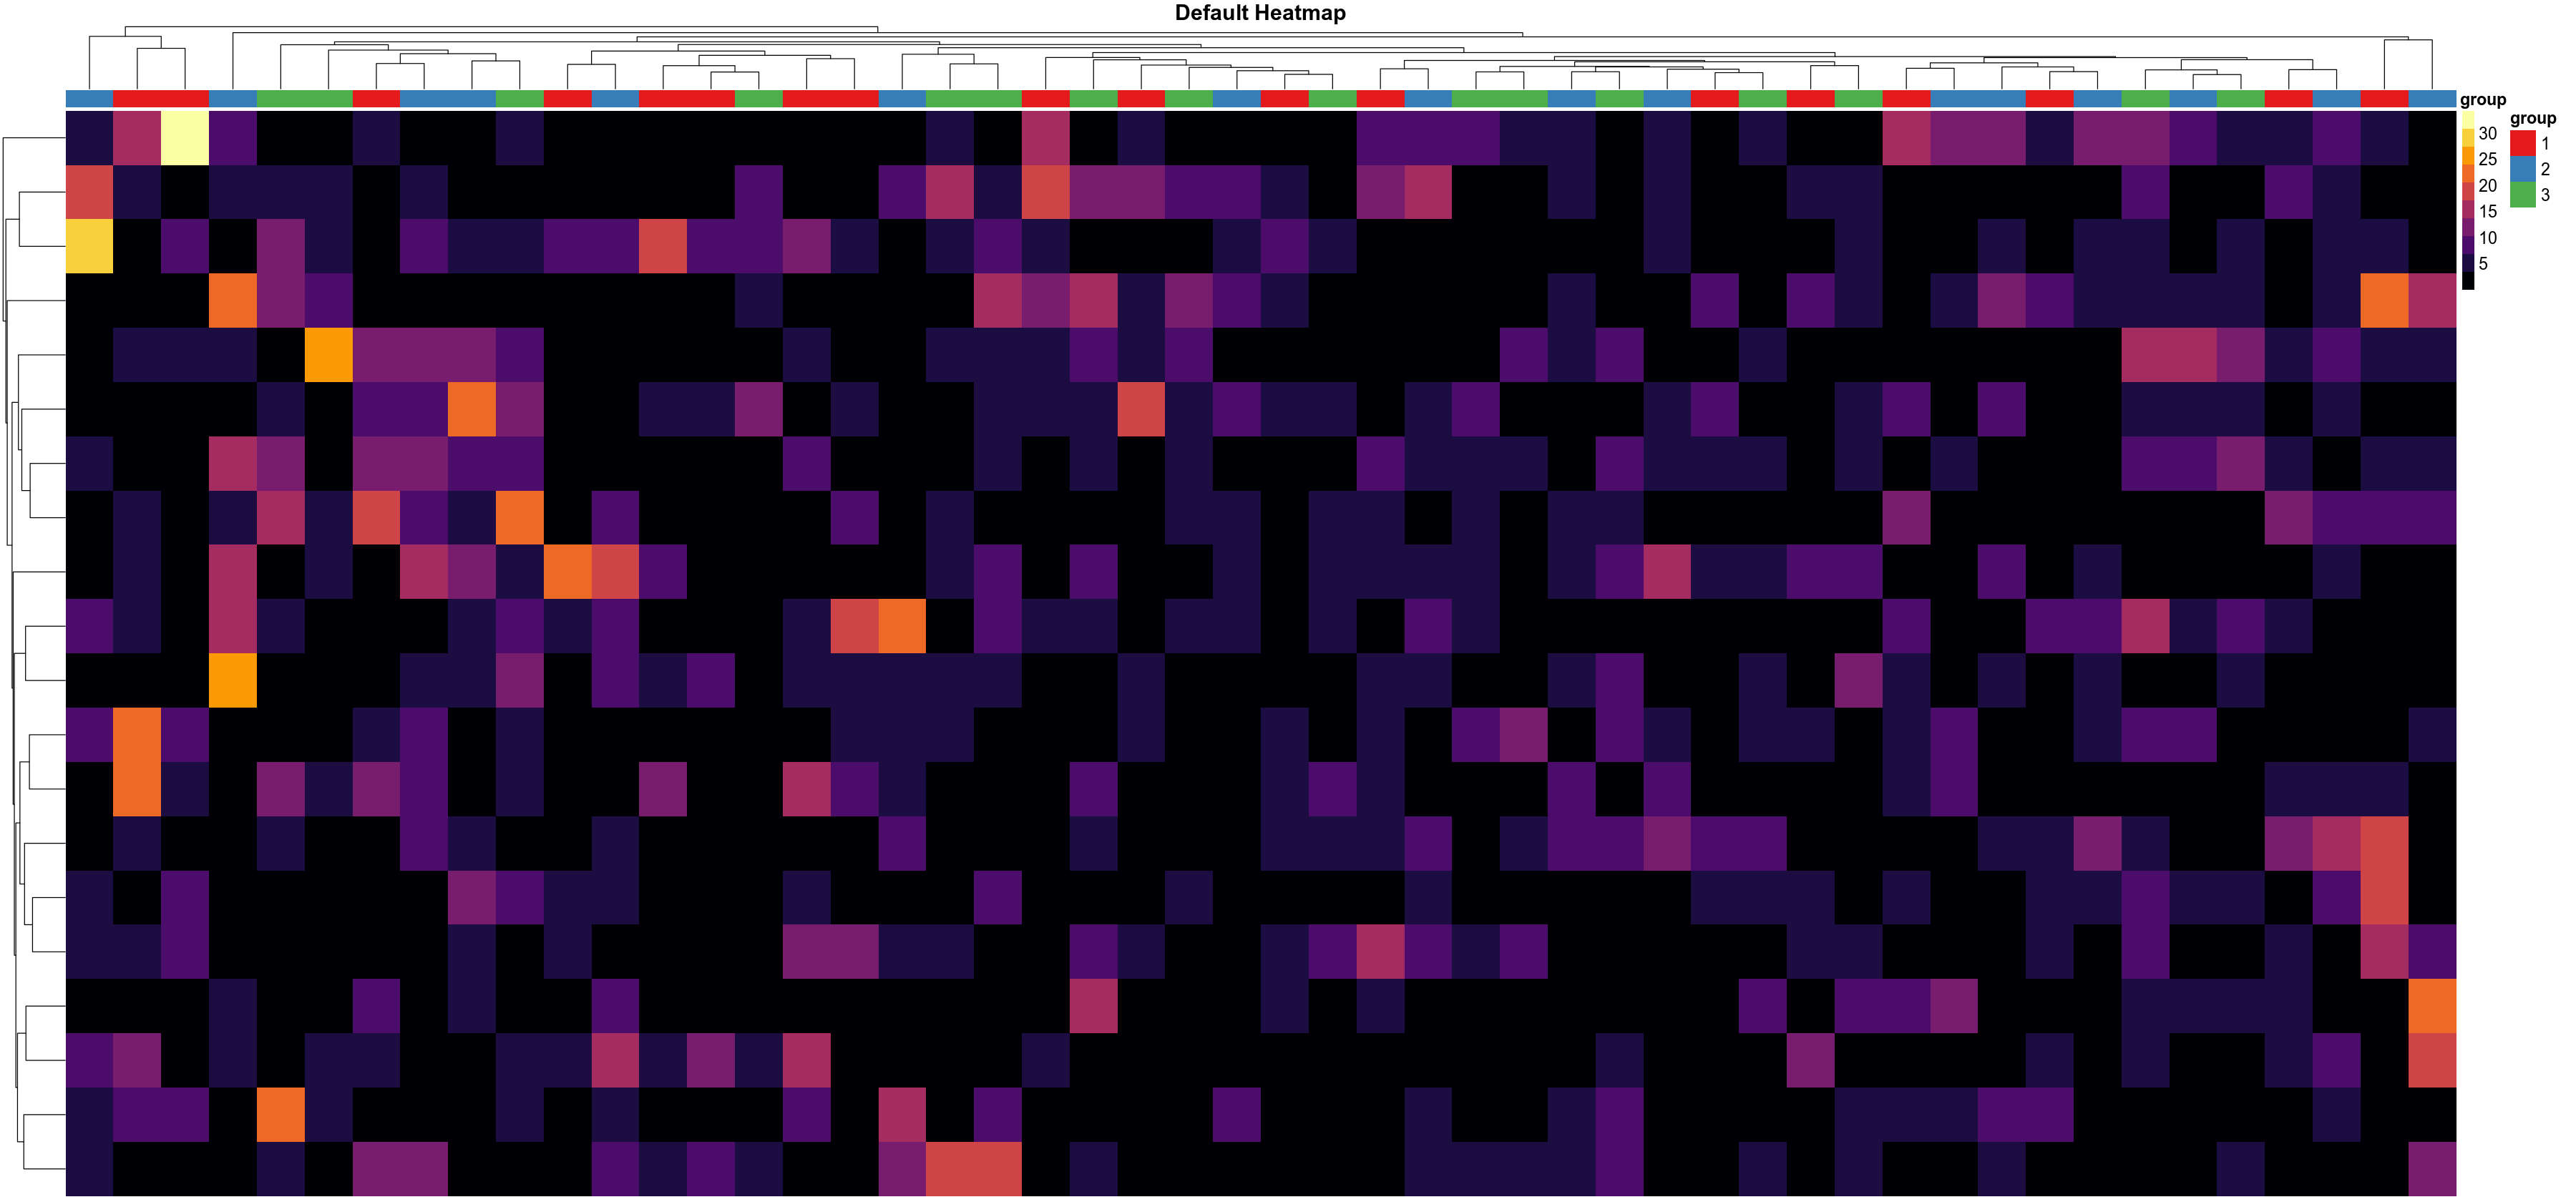

In [112]:
set.seed(42)
random_string <- function(n) {
  substr(paste(sample(letters), collapse = ""), 1, n)
}

mat <- matrix(rgamma(1000, shape = 1) * 5, ncol = 50)

colnames(mat) <- paste(
  rep(1:3, each = ncol(mat) / 3),
  replicate(ncol(mat), random_string(5)),
  sep = ""
)
rownames(mat) <- replicate(nrow(mat), random_string(3))
col_groups <- substr(colnames(mat), 1, 1)
col_groups
typeof(col_groups)
# Data frame with column annotations.
mat_col <- data.frame(group = col_groups)
rownames(mat_col) <- colnames(mat)

# List with colors for each annotation.
mat_colors <- list(group = brewer.pal(3, "Set1"))
names(mat_colors$group) <- unique(col_groups)
mat
mat_col
mat_colors

pheatmap(
  mat               = mat,
  color             = inferno(10),
  border_color      = NA,
  show_colnames     = FALSE,
  show_rownames     = FALSE,
  annotation_col    = mat_col,
  annotation_colors = mat_colors,
  drop_levels       = TRUE,
  fontsize          = 14,
  main              = "Default Heatmap"
)

In [119]:
mat

Gene,DKK2,RYBP,VSTM5,S100A8,ZNF670,CNPY3-GNMT,TSC22D1,ACBD7,KCND2,UBE2N,⋯,KPNA5,DDX31,NRXN1,MTHFD1L,ANTXR2,ZNF185,ACTR3C,HDAC8,NETO1,PARN
0,99,99,99,98,98,98,98,97,97,97,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,2,2,1,⋯,13,9,9,4,1,1,1,1,1,1
2,0,1,0,1,1,1,1,1,0,2,⋯,4,1,0,1,8,4,1,0,0,0
3,6,6,6,6,6,0,0,6,1,6,⋯,0,0,0,0,0,0,0,0,0,0
4,5,5,5,5,5,0,5,5,0,5,⋯,11,1,0,2,0,1,9,30,5,5


In [28]:
quantile_breaks <- function(xs, n = 10) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(mat, n = 11)
mat_breaks <- c(20,30,40,50,60,70,80,90,100)
mat_breaks

[1]  20  30  40  50  60  70  80  90 100

ERROR: Error in parse(text = x, srcfile = src): <text>:9:0: unexpected end of input
7:    grid::grid.draw(x$gtable)
8:    dev.off()
  ^


png 
  2

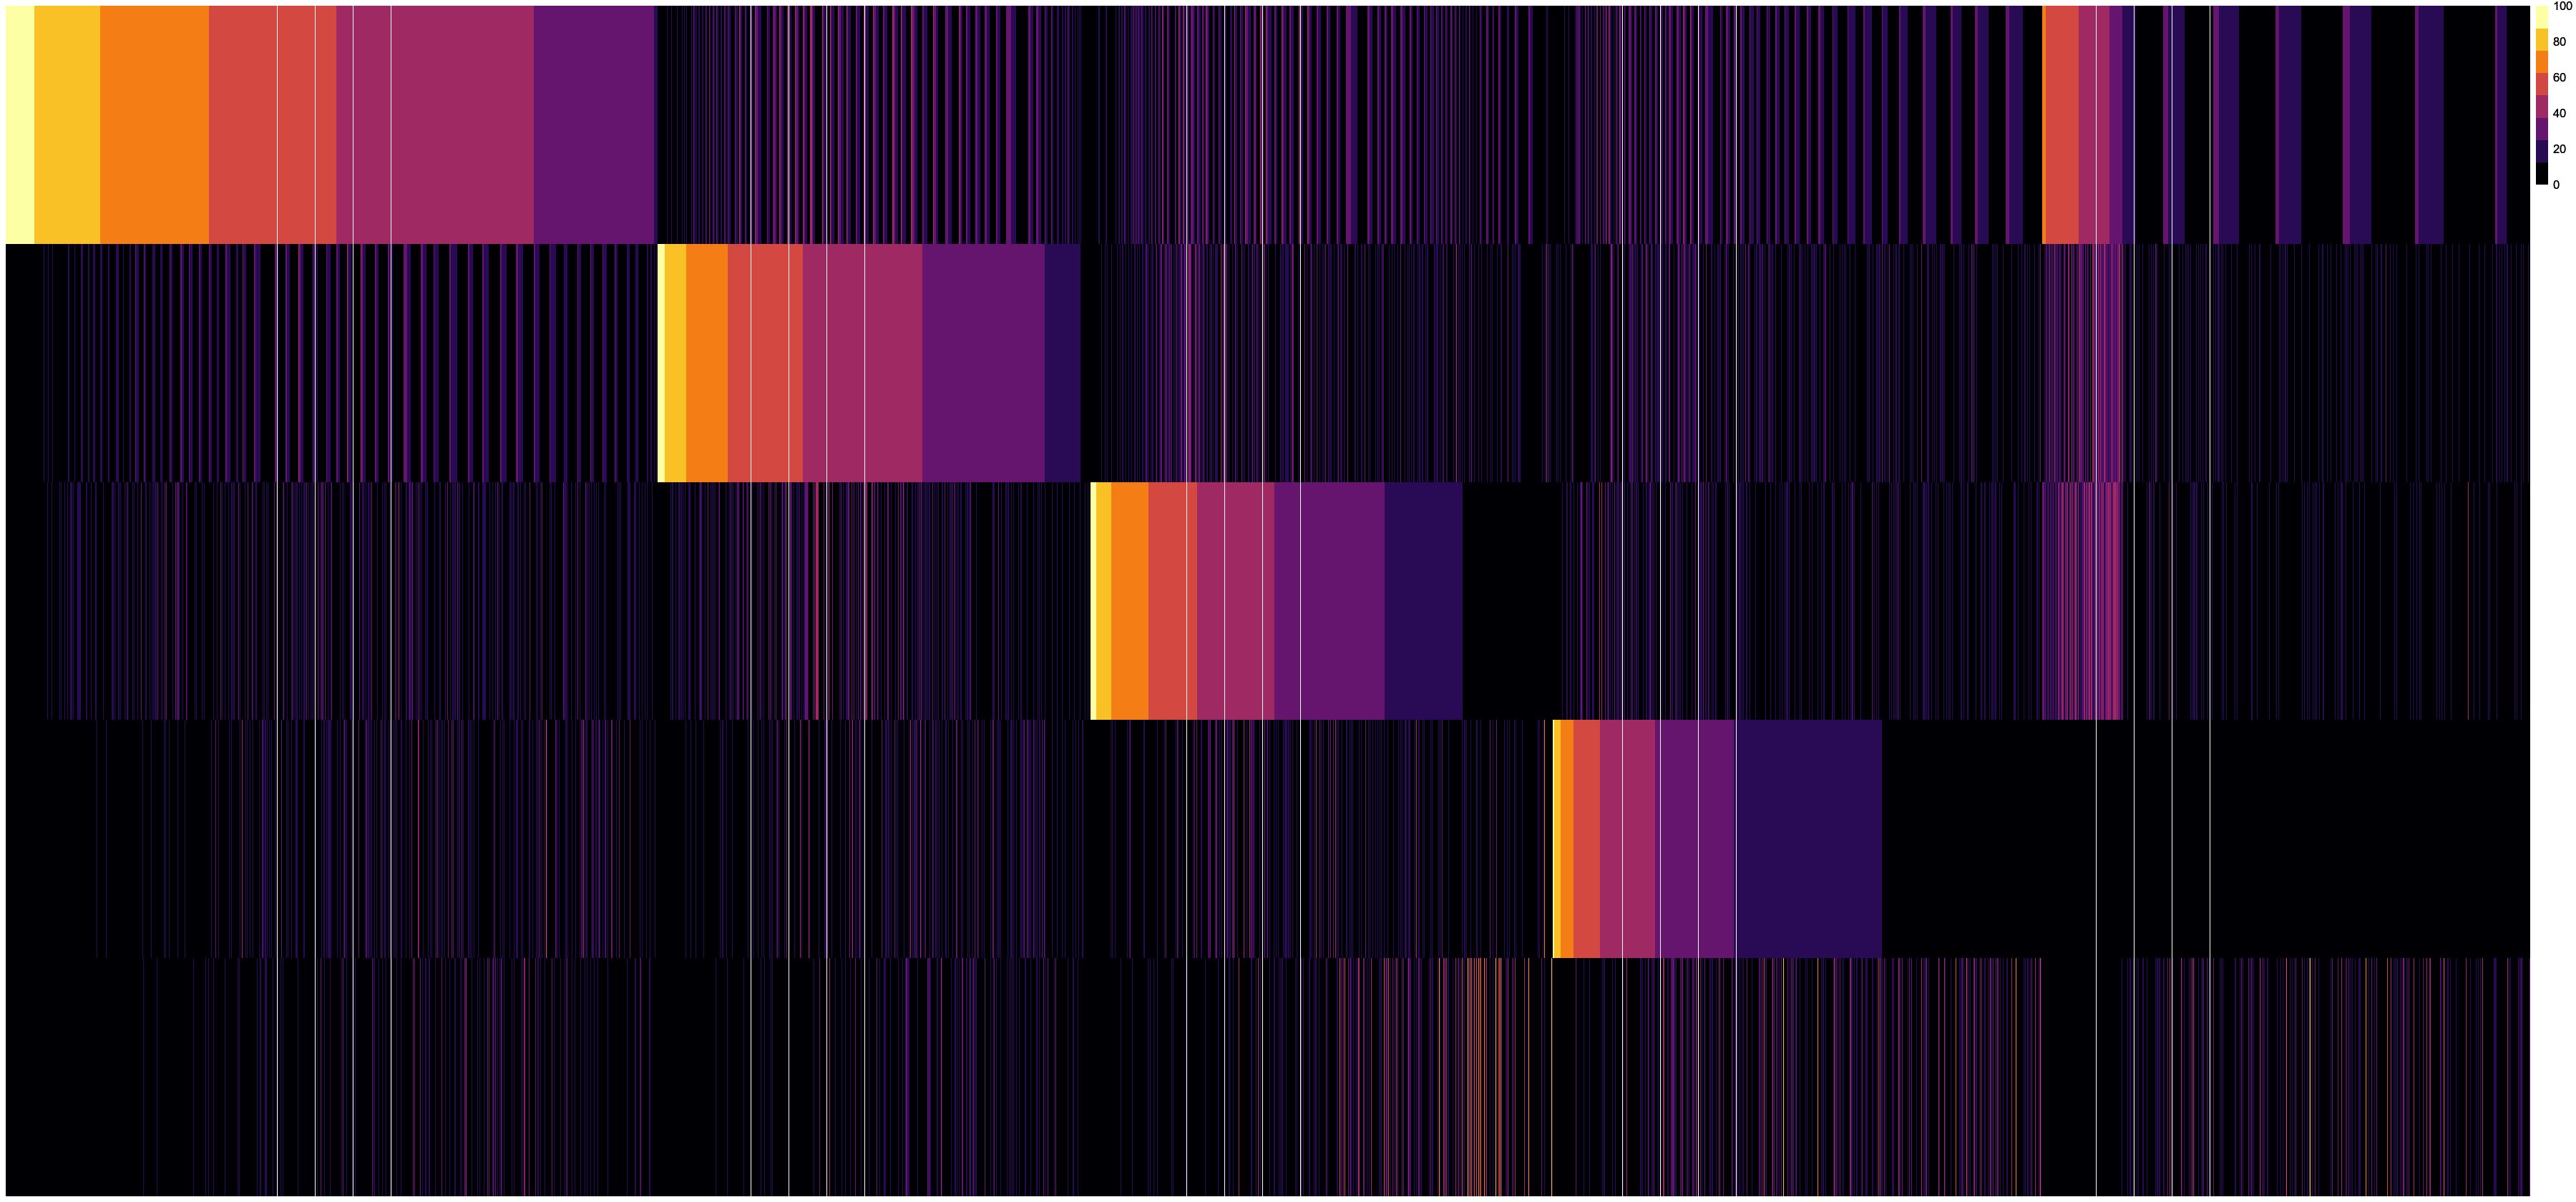

In [21]:
library(pheatmap)
library(RColorBrewer)
library(viridis)
library("readxl")


w = 30
h = 14

options(repr.plot.width=w, repr.plot.height=h)


data <- read_excel('/gstock/EXOTIC/data/CLUSTERING/data_genes_clustering_processed_R.xlsx')
data$cluster_new <- data$cluster_new + 1
data$cluster_new <- as.character(data$cluster_new)

# data$cluster_new <- sub("^", "Clust", data$cluster_new )
mat <- as.matrix(data[, c(1, 5:9)])

my_group <- as.factor(as.factor(data$cluster_new))
# typeof(my_group)
mat <- t(mat)
cols <- mat[1,]
rows <- rownames(mat)
mat <- mat[-1,]
mat <- matrix(as.numeric(mat),    # Convert to numeric matrix
                  ncol = ncol(mat))
colnames(mat) <- cols
mat_col <- data.frame(group = my_group)
rownames(mat_col) <- as.factor(data$Gene)
# mat_col
mat_colors <- list(group = brewer.pal(4, "Set1"))
names(mat_colors$group) <- as.character(unique(my_group))


# png()

p <- pheatmap(
  mat               = mat,
#   color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100),
  color             = inferno(8),
#   breaks            = mat_breaks,

#   border_color      = NA,
  show_colnames     = FALSE,
  show_rownames     = TRUE,
#   annotation        = mat_col,
#   annotation_colors = mat_colors,
#   drop_levels       = TRUE,
#   fontsize          = 20,
#   main              = Default Heatmap", 
  cluster_rows=FALSE, cluster_cols=FALSE,
#     cellwidth = 20, cellheight = 20, # <--- changed here
#          width = 40, height=30
)
# pheatmap


save_pheatmap_pdf <- function(x, filename, width=1400, height=700) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

# dev.off()
# save_pheatmap_pdf(p, '/gstock/EXOTIC/data/CLUSTERING/pheatmap_test.png')
p

,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,Test10
Gene1,2.6991227,0.6763226,3.6829962,-0.13999982,3.86658508,-1.2603527,1.4616019,1.71140423,4.56062213,-0.71296943
Gene2,3.4115022,0.3245877,3.3449013,-0.32542001,2.90163285,-0.9777073,2.5090294,-0.16695623,3.69325328,-0.63930007
Gene3,3.1472373,-2.5738194,3.8103403,0.07240789,1.75287604,0.6264257,4.8699925,-1.50982461,2.59219870,-0.88252616
Gene4,4.1648853,1.4071806,3.5865255,0.39198315,3.73815876,-0.3060321,2.3395702,3.18362106,4.75925872,0.87777317
Gene5,2.9626071,0.6737339,2.7872968,-1.35576887,3.16388576,-0.6406686,1.7433286,0.30994572,3.24015417,0.07349608
Gene6,2.1838064,-0.8651566,2.0902072,1.23429759,2.89629057,0.2609962,3.5886659,-0.08723892,1.48652846,0.20499712
Gene7,5.9143975,1.4311383,2.9799368,-0.19216042,1.94689864,0.4297656,3.8586710,2.37648576,3.43908264,-0.17528137
Gene8,1.7477558,0.2286660,2.1300505,0.79862927,2.56925995,-0.7585119,3.6015304,0.41118264,2.48208536,-0.89334779
Gene9,3.2171546,-1.5965966,4.0607667,0.95737185,2.98692878,-1.8771558,1.1365263,0.22042373,4.01294930,0.50482923
Gene10,2.1625134,-0.5381864,3.5070446,0.15294566,2.10638307,0.4925553,1.9766588,-0.19882059,1.51676773,0.55732670


,Var1
,<fct>
Test1,Exp1
Test2,Exp2
Test3,Exp1
Test4,Exp2
Test5,Exp1
Test6,Exp2
Test7,Exp1
Test8,Exp2
Test9,Exp1


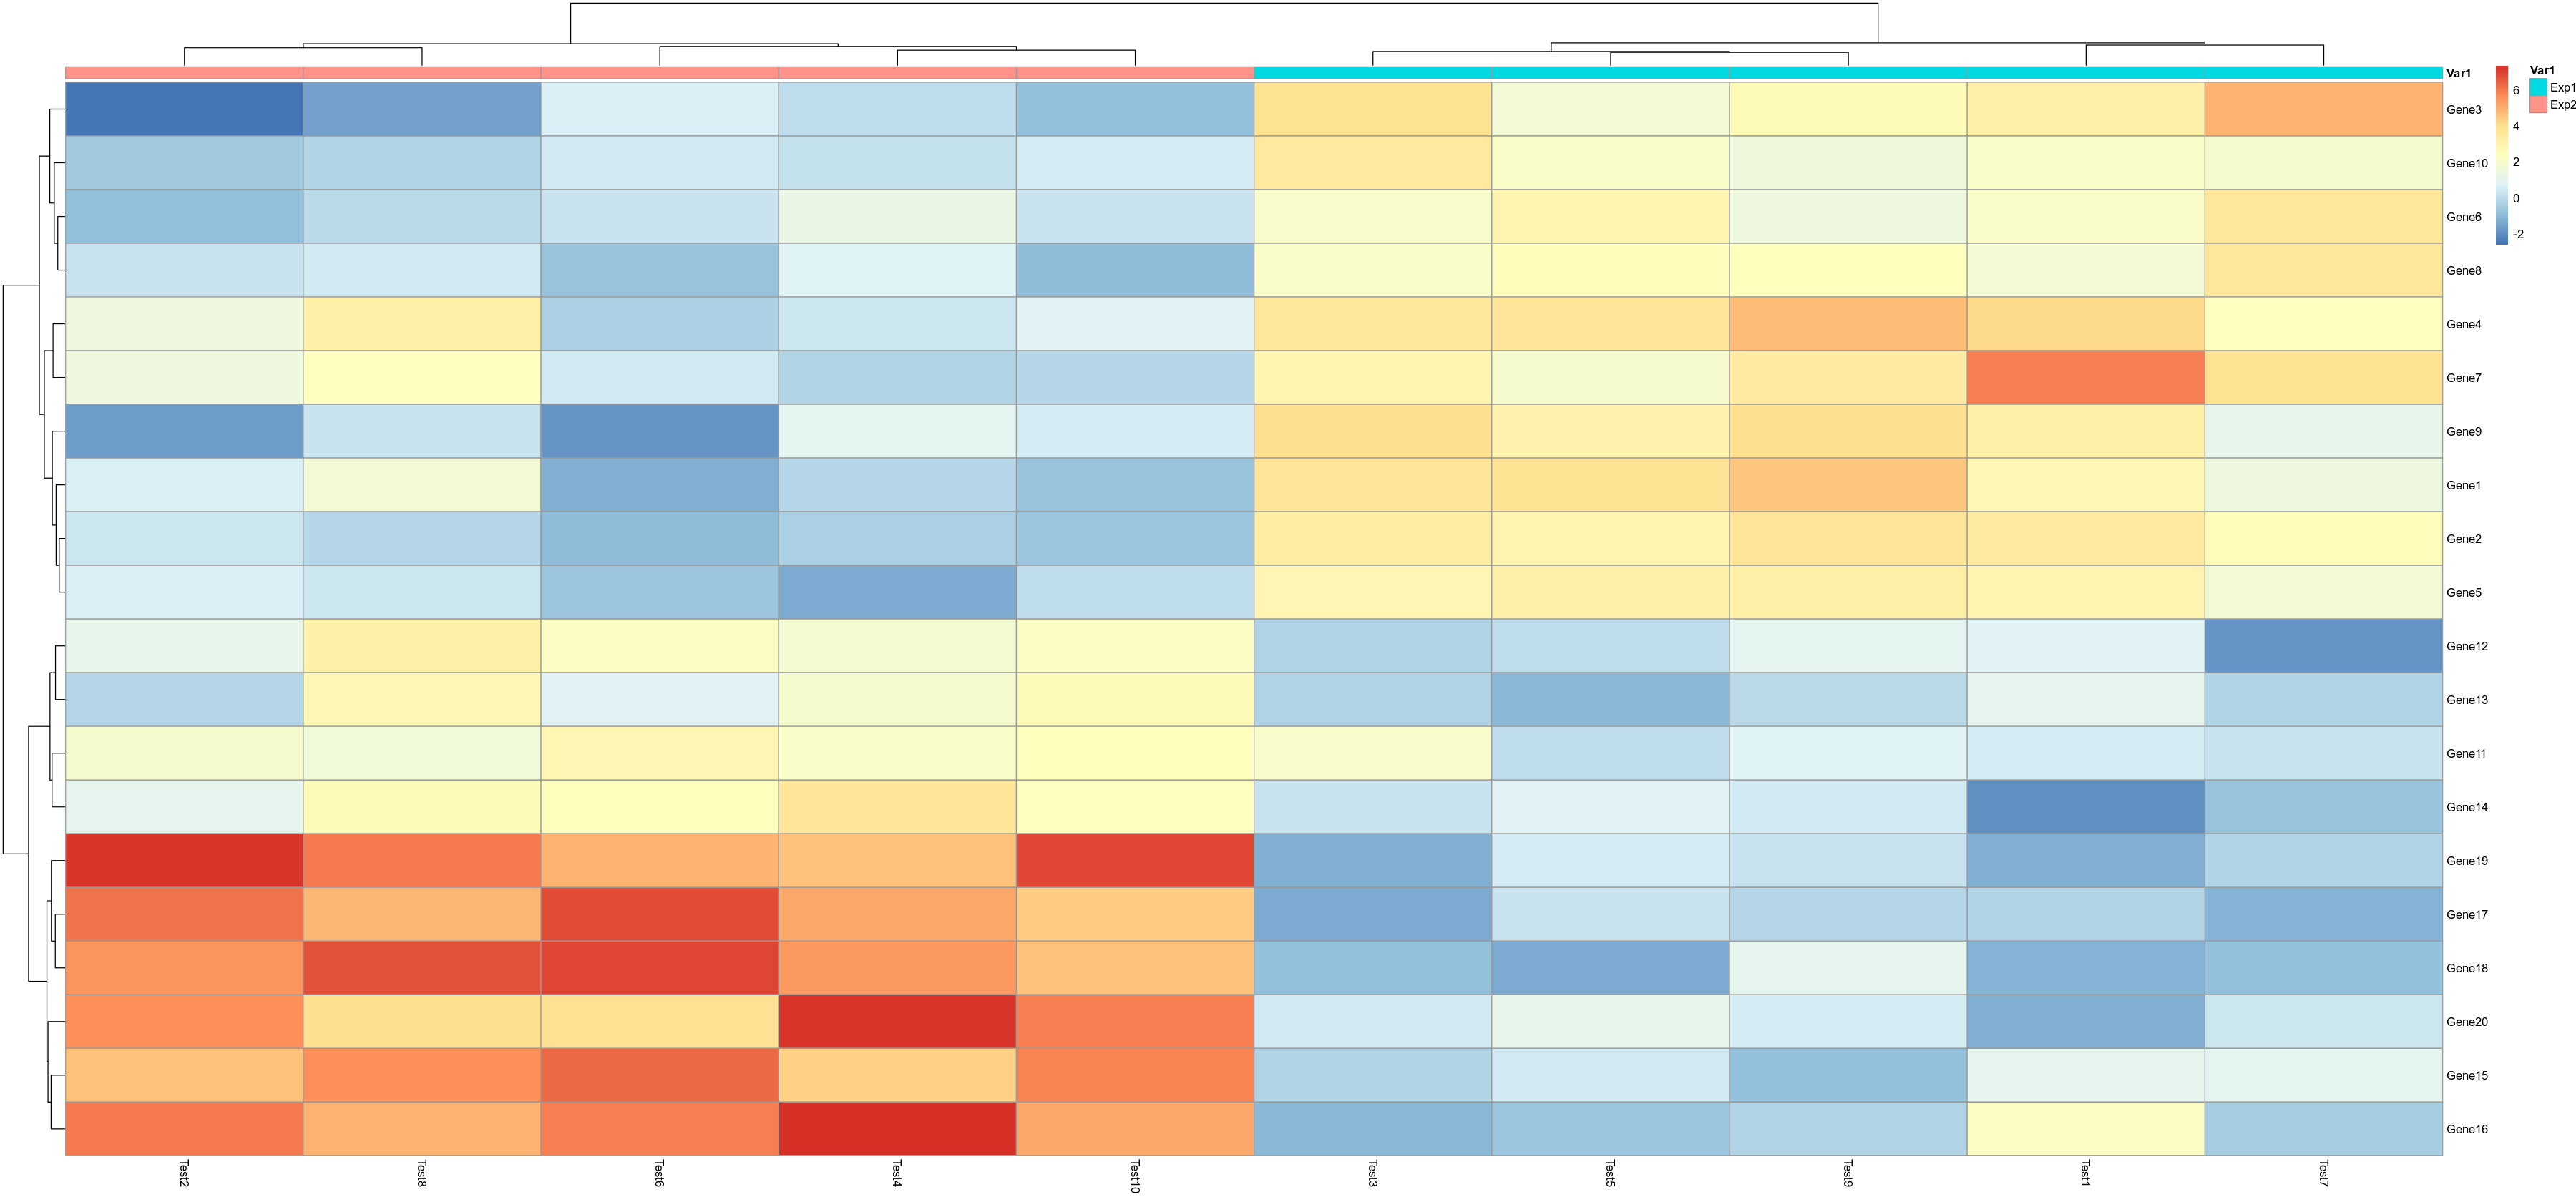

In [171]:
test = matrix(rnorm(200), 20, 10)
test[1:10, seq(1, 10, 2)] = test[1:10, seq(1, 10, 2)] + 3
test[11:20, seq(2, 10, 2)] = test[11:20, seq(2, 10, 2)] + 2
test[15:20, seq(2, 10, 2)] = test[15:20, seq(2, 10, 2)] + 4
colnames(test) = paste("Test", 1:10, sep = "")
rownames(test) = paste("Gene", 1:20, sep = "")
annotation <- data.frame(Var1 = factor(1:10 %% 2 == 0, labels = c("Exp1", "Exp2")))
# annotation
rownames(annotation) <- colnames(test) # check out the row names of annotation
test
annotation
pheatmap(test, annotation = annotation)


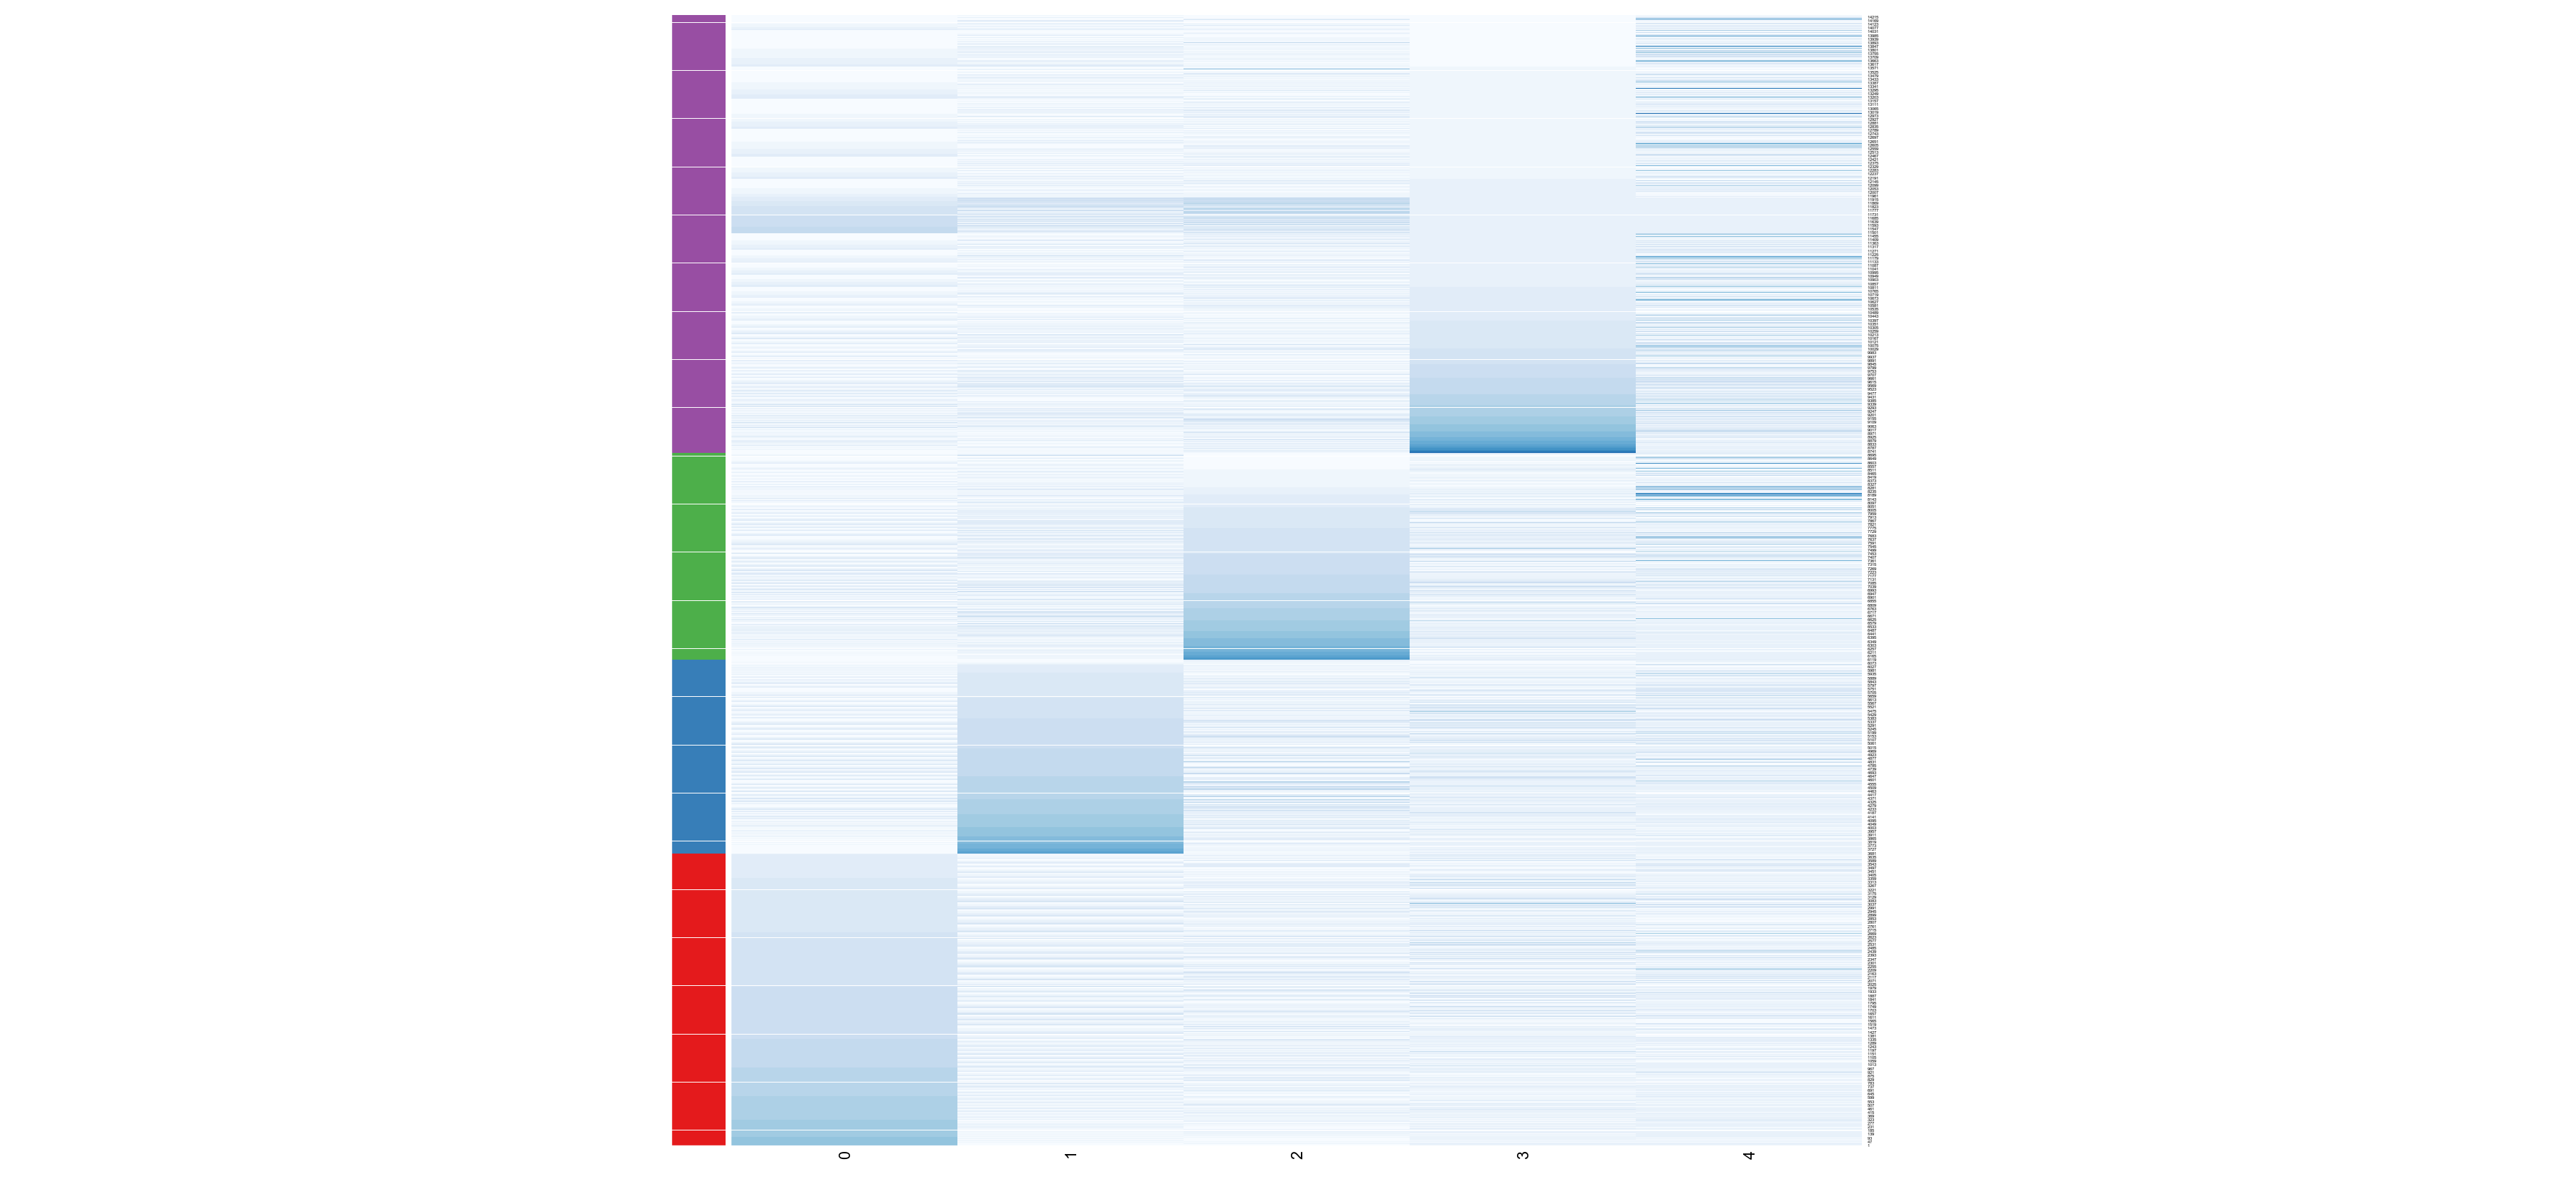

In [61]:
library(RColorBrewer)
data <- read_excel('/gstock/EXOTIC/data/CLUSTERING/data_genes_clustering_processed_R.xlsx')
data_heatmap <- as.matrix(data[, c(5:9)])
my_group <- as.numeric(as.factor(substr(data$cluster_new, 1 , 1)))
colSide <- brewer.pal(4, "Set1")[my_group]
colMain <- colorRampPalette(brewer.pal(8, "Blues"))(25)
# data_heatmap
heatmap(data_heatmap, Colv = NA, Rowv = NA, scale="column", RowSideColors=colSide, col=colMain   )

In [237]:
# A treemap R script produced by the REVIGO server at http://revigo.irb.hr/
# If you found REVIGO useful in your work, please cite the following reference:
# Supek F et al. "REVIGO summarizes and visualizes long lists of Gene Ontology
# terms" PLoS ONE 2011. doi:10.1371/journal.pone.0021800

# author: Anton Kratz <anton.kratz@gmail.com>, RIKEN Omics Science Center, Functional Genomics Technology Team, Japan
# created: Fri, Nov 02, 2012  7:25:52 PM
# last change: Fri, Nov 09, 2012  3:20:01 PM

# -----------------------------------------------------------------------------
# If you don't have the treemap package installed, uncomment the following line:
install.packages( "treemap" );
library(treemap) 								# treemap package by Martijn Tennekes

# Set the working directory if necessary
# setwd("C:/Users/username/workingdir");

# --------------------------------------------------------------------------
# Here is your data from REVIGO. Scroll down for plot configuration options.

revigo.names <- c("term_ID","description","freqInDbPercent","uniqueness","dispensability","representative");
revigo.data <- rbind(c("GO:0018193","peptidyl-amino acid modification",4.913,0.941,0.000,"peptidyl-amino acid modification"),
c("GO:0006793","phosphorus metabolic process",10.202,0.961,0.189,"peptidyl-amino acid modification"),
c("GO:0018212","peptidyl-tyrosine modification",0.881,0.942,0.386,"peptidyl-amino acid modification"),
c("GO:0006468","protein phosphorylation",3.859,0.901,0.477,"peptidyl-amino acid modification"),
c("GO:0016310","phosphorylation",4.902,0.921,0.659,"peptidyl-amino acid modification"),
c("GO:0040011","locomotion",7.431,1.000,0.000,"locomotion"),
c("GO:0043408","regulation of MAPK cascade",3.875,0.970,0.000,"regulation of MAPK cascade"),
c("GO:0072178","nephric duct morphogenesis",0.056,0.794,0.000,"nephric duct morphogenesis"),
c("GO:0008038","neuron recognition",0.269,0.636,0.162,"nephric duct morphogenesis"),
c("GO:0009653","anatomical structure morphogenesis",11.918,0.756,0.212,"nephric duct morphogenesis"),
c("GO:0000902","cell morphogenesis",3.892,0.706,0.349,"nephric duct morphogenesis"),
c("GO:0048869","cellular developmental process",20.067,0.753,0.411,"nephric duct morphogenesis"),
c("GO:0007399","nervous system development",12.210,0.718,0.414,"nephric duct morphogenesis"),
c("GO:0106030","neuron projection fasciculation",0.118,0.630,0.463,"nephric duct morphogenesis"),
c("GO:0030154","cell differentiation",19.804,0.639,0.476,"nephric duct morphogenesis"),
c("GO:0050767","regulation of neurogenesis",1.991,0.576,0.505,"nephric duct morphogenesis"),
c("GO:0120036","plasma membrane bounded cell projection organization",6.461,0.715,0.531,"nephric duct morphogenesis"),
c("GO:0032990","cell part morphogenesis",2.877,0.586,0.552,"nephric duct morphogenesis"),
c("GO:0000904","cell morphogenesis involved in differentiation",3.045,0.567,0.556,"nephric duct morphogenesis"),
c("GO:0032989","cellular component morphogenesis",3.354,0.640,0.564,"nephric duct morphogenesis"),
c("GO:0022008","neurogenesis",7.605,0.611,0.612,"nephric duct morphogenesis"),
c("GO:0048468","cell development",9.097,0.674,0.639,"nephric duct morphogenesis"),
c("GO:0007413","axonal fasciculation",0.118,0.596,0.673,"nephric duct morphogenesis"),
c("GO:0050808","synapse organization",1.570,0.898,0.005,"synapse organization"),
c("GO:0016043","cellular component organization",32.036,0.851,0.277,"synapse organization"),
c("GO:0030030","cell projection organization",6.719,0.876,0.382,"synapse organization"),
c("GO:0071840","cellular component organization or biogenesis",33.281,0.990,0.009,"cellular component organization or biogenesis"),
c("GO:1905244","regulation of modification of synaptic structure",0.073,0.915,0.032,"regulation of modification of synaptic structure"),
c("GO:1901888","regulation of cell junction assembly",1.133,0.892,0.300,"regulation of modification of synaptic structure"),
c("GO:0010977","negative regulation of neuron projection development",0.768,0.842,0.376,"regulation of modification of synaptic structure"),
c("GO:0031344","regulation of cell projection organization",3.674,0.878,0.451,"regulation of modification of synaptic structure"),
c("GO:0031345","negative regulation of cell projection organization",1.021,0.848,0.673,"regulation of modification of synaptic structure"),
c("GO:1903078","positive regulation of protein localization to plasma membrane",0.337,0.936,0.037,"positive regulation of protein localization to plasma membrane"),
c("GO:0033674","positive regulation of kinase activity",3.382,0.837,0.174,"positive regulation of protein localization to plasma membrane"),
c("GO:0051338","regulation of transferase activity",5.642,0.932,0.553,"positive regulation of protein localization to plasma membrane"),
c("GO:0007167","enzyme linked receptor protein signaling pathway",4.021,0.925,0.052,"enzyme linked receptor protein signaling pathway"),
c("GO:0006935","chemotaxis",3.017,0.900,0.117,"enzyme linked receptor protein signaling pathway"),
c("GO:0007169","transmembrane receptor protein tyrosine kinase signaling pathway",2.894,0.919,0.501,"enzyme linked receptor protein signaling pathway"),
c("GO:0071679","commissural neuron axon guidance",0.062,0.572,0.622,"enzyme linked receptor protein signaling pathway"),
c("GO:0042330","taxis",3.034,0.920,0.688,"enzyme linked receptor protein signaling pathway"),
c("GO:0048013","ephrin receptor signaling pathway",0.482,0.931,0.695,"enzyme linked receptor protein signaling pathway"));

stuff <- data.frame(revigo.data);
names(stuff) <- revigo.names;

stuff$freqInDbPercent <- as.numeric( as.character(stuff$freqInDbPercent) );
stuff$uniqueness <- as.numeric( as.character(stuff$uniqueness) );
stuff$dispensability <- as.numeric( as.character(stuff$dispensability) );

# by default, outputs to a PDF file
# pdf( file="revigo_treemap.pdf", width=16, height=9 ) # width and height are in inches

# check the tmPlot command documentation for all possible parameters - there are a lot more
treemap(
  stuff,
  index = c("representative","description"),
  vSize = "uniqueness",
  type = "categorical",
  vColor = "representative",
  title = "REVIGO TreeMap",
  inflate.labels = FALSE,      # set this to TRUE for space-filling group labels - good for posters
  lowerbound.cex.labels = 0,   # try to draw as many labels as possible (still, some small squares may not get a label)
  bg.labels = "#CCCCCCAA",   # define background color of group labels
								 # "#CCCCCC00" is fully transparent, "#CCCCCCAA" is semi-transparent grey, NA is opaque
  position.legend = "none"
)

# dev.off()



also installing the dependency ‘igraph’


Warning message in install.packages("treemap"):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages("treemap"):
“installation of package ‘treemap’ had non-zero exit status”


ERROR: Error in library(treemap): there is no package called ‘treemap’


Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



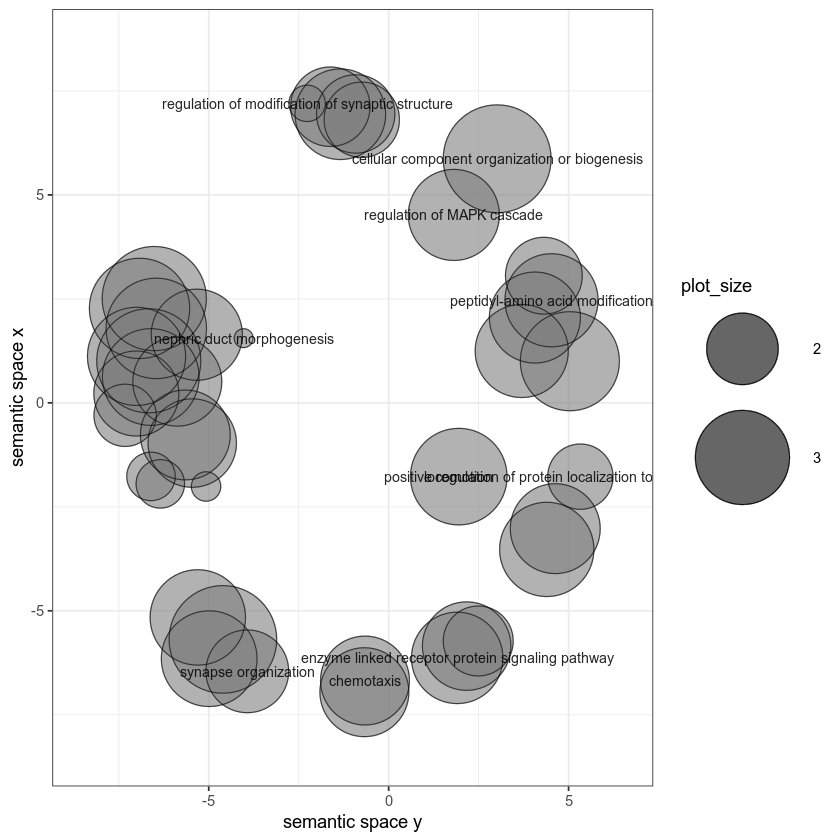

In [3]:
# A plotting R script produced by the REVIGO server at http://revigo.irb.hr/
# If you found REVIGO useful in your work, please cite the following reference:
# Supek F et al. "REVIGO summarizes and visualizes long lists of Gene Ontology
# terms" PLoS ONE 2011. doi:10.1371/journal.pone.0021800

# --------------------------------------------------------------------------
# If you don't have the ggplot2 package installed, uncomment the following line:
# install.packages( "ggplot2" );
library( ggplot2 );

# --------------------------------------------------------------------------
# If you don't have the scales package installed, uncomment the following line:
install.packages( "scales" );
library( scales );

# --------------------------------------------------------------------------
# Here is your data from REVIGO. Scroll down for plot configuration options.

revigo.names <- c("term_ID","description","frequency_%","plot_X","plot_Y","plot_size","uniqueness","dispensability");
revigo.data <- rbind(c("GO:0018193","peptidyl-amino acid modification",4.913,4.525,2.466,2.943,0.941,0.000),
c("GO:0040011","locomotion",7.431,1.948,-1.774,3.123,1.000,0.000),
c("GO:0043408","regulation of MAPK cascade",3.875,1.811,4.518,2.840,0.970,0.000),
c("GO:0072178","nephric duct morphogenesis",0.056,-4.031,1.555,1.041,0.794,0.000),
c("GO:0050808","synapse organization",1.570,-3.929,-6.455,2.449,0.898,0.005),
c("GO:0071840","cellular component organization or biogenesis",33.281,3.015,5.868,3.773,0.990,0.009),
c("GO:1905244","regulation of modification of synaptic structure",0.073,-2.267,7.201,1.146,0.915,0.032),
c("GO:1903078","positive regulation of protein localization to plasma membrane",0.337,5.328,-1.775,1.785,0.936,0.037),
c("GO:0007167","enzyme linked receptor protein signaling pathway",4.021,1.904,-6.132,2.856,0.925,0.052),
c("GO:0006935","chemotaxis",3.017,-0.658,-6.677,2.732,0.900,0.117),
c("GO:0008038","neuron recognition",0.269,-7.325,-0.300,1.690,0.636,0.162),
c("GO:0033674","positive regulation of kinase activity",3.382,4.630,-3.025,2.781,0.837,0.174),
c("GO:0006793","phosphorus metabolic process",10.202,5.036,1.001,3.260,0.961,0.189),
c("GO:0009653","anatomical structure morphogenesis",11.918,-6.924,2.271,3.328,0.756,0.212),
c("GO:0016043","cellular component organization",32.036,-4.607,-5.688,3.757,0.851,0.277),
c("GO:1901888","regulation of cell junction assembly",1.133,-1.623,7.120,2.307,0.892,0.300),
c("GO:0000902","cell morphogenesis",3.892,-5.332,1.638,2.842,0.706,0.349),
c("GO:0010977","negative regulation of neuron projection development",0.768,-0.747,6.807,2.140,0.842,0.376),
c("GO:0030030","cell projection organization",6.719,-4.988,-6.151,3.079,0.876,0.382),
c("GO:0018212","peptidyl-tyrosine modification",0.881,4.313,3.057,2.199,0.942,0.386),
c("GO:0048869","cellular developmental process",20.067,-6.514,2.507,3.554,0.753,0.411),
c("GO:0007399","nervous system development",12.210,-6.458,1.790,3.338,0.718,0.414),
c("GO:0031344","regulation of cell projection organization",3.674,-1.343,6.939,2.817,0.878,0.451),
c("GO:0106030","neuron projection fasciculation",0.118,-6.346,-1.949,1.342,0.630,0.463),
c("GO:0030154","cell differentiation",19.804,-6.667,1.011,3.548,0.639,0.476),
c("GO:0006468","protein phosphorylation",3.859,4.063,2.051,2.838,0.901,0.477),
c("GO:0007169","transmembrane receptor protein tyrosine kinase signaling pathway",2.894,2.167,-5.849,2.713,0.919,0.501),
c("GO:0050767","regulation of neurogenesis",1.991,-7.013,0.224,2.551,0.576,0.505),
c("GO:0120036","plasma membrane bounded cell projection organization",6.461,-5.304,-5.159,3.062,0.715,0.531),
c("GO:0032990","cell part morphogenesis",2.877,-5.459,-0.967,2.711,0.586,0.552),
c("GO:0051338","regulation of transferase activity",5.642,4.393,-3.524,3.003,0.932,0.553),
c("GO:0000904","cell morphogenesis involved in differentiation",3.045,-5.874,0.510,2.736,0.567,0.556),
c("GO:0032989","cellular component morphogenesis",3.354,-5.651,-0.772,2.777,0.640,0.564),
c("GO:0022008","neurogenesis",7.605,-6.612,0.621,3.133,0.611,0.612),
c("GO:0071679","commissural neuron axon guidance",0.062,-5.075,-2.011,1.079,0.572,0.622),
c("GO:0048468","cell development",9.097,-7.007,1.118,3.210,0.674,0.639),
c("GO:0016310","phosphorylation",4.902,3.698,1.247,2.942,0.921,0.659),
c("GO:0007413","axonal fasciculation",0.118,-6.605,-1.769,1.342,0.596,0.673),
c("GO:0031345","negative regulation of cell projection organization",1.021,-0.917,6.946,2.262,0.848,0.673),
c("GO:0042330","taxis",3.034,-0.675,-6.957,2.734,0.920,0.688),
c("GO:0048013","ephrin receptor signaling pathway",0.482,2.489,-5.726,1.940,0.931,0.695));

one.data <- data.frame(revigo.data);
names(one.data) <- revigo.names;
one.data <- one.data [(one.data$plot_X != "null" & one.data$plot_Y != "null"), ];
one.data$plot_X <- as.numeric( as.character(one.data$plot_X) );
one.data$plot_Y <- as.numeric( as.character(one.data$plot_Y) );
one.data$plot_size <- as.numeric( as.character(one.data$plot_size) );
one.data$frequency <- as.numeric( as.character(one.data$frequency) );
one.data$uniqueness <- as.numeric( as.character(one.data$uniqueness) );
one.data$dispensability <- as.numeric( as.character(one.data$dispensability) );
#head(one.data);


# --------------------------------------------------------------------------
# Names of the axes, sizes of the numbers and letters, names of the columns,
# etc. can be changed below

p1 <- ggplot( data = one.data );
p1 <- p1 + geom_point( aes( plot_X, plot_Y, colour = uniqueness, size = plot_size), alpha = I(0.6) ) + scale_size_area();
p1 <- p1 + scale_colour_gradientn( colours = c("blue", "green", "yellow", "red"), limits = c( min(one.data$uniqueness), 0) );
p1 <- p1 + geom_point( aes(plot_X, plot_Y, size = plot_size), shape = 21, fill = "transparent", colour = I (alpha ("black", 0.6) )) + scale_size_area();
p1 <- p1 + scale_size( range=c(5, 30)) + theme_bw(); # + scale_fill_gradientn(colours = heat_hcl(7), limits = c(-300, 0) );
ex <- one.data [ one.data$dispensability < 0.15, ];
p1 <- p1 + geom_text( data = ex, aes(plot_X, plot_Y, label = description), colour = I(alpha("black", 0.85)), size = 3 );
p1 <- p1 + labs (y = "semantic space x", x = "semantic space y");
p1 <- p1 + theme(legend.key = element_blank()) ;
one.x_range = max(one.data$plot_X) - min(one.data$plot_X);
one.y_range = max(one.data$plot_Y) - min(one.data$plot_Y);
p1 <- p1 + xlim(min(one.data$plot_X)-one.x_range/10,max(one.data$plot_X)+one.x_range/10);
p1 <- p1 + ylim(min(one.data$plot_Y)-one.y_range/10,max(one.data$plot_Y)+one.y_range/10);


# --------------------------------------------------------------------------
# Output the plot to screen

p1;

# Uncomment the line below to also save the plot to a file.
# The file type depends on the extension (default=pdf).

# ggsave("/path_to_your_file/revigo-plot.pdf");



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


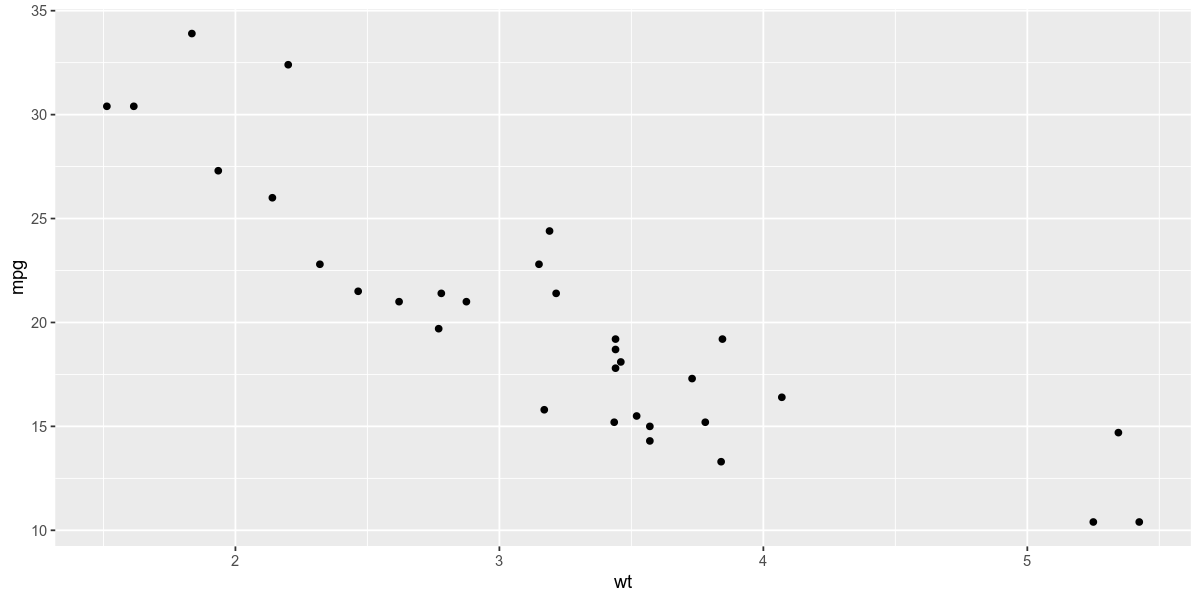

In [65]:
p <- ggplot(mtcars, aes(wt, mpg))
p + geom_point()
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


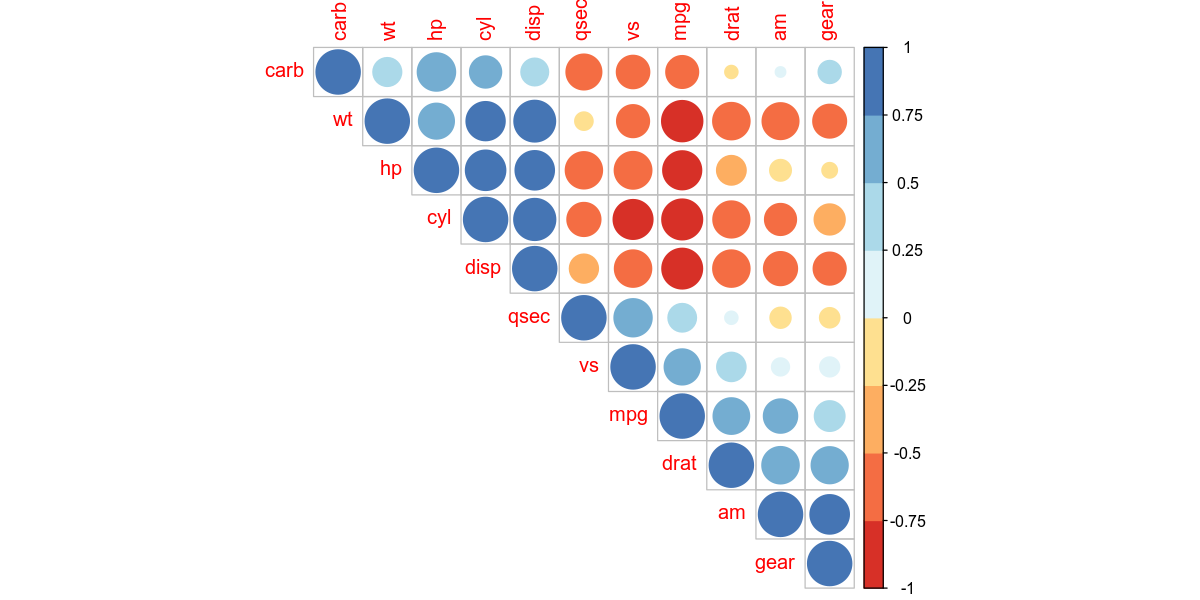

In [151]:
library(corrplot)
library(RColorBrewer)
M <-cor(mtcars)
mtcars
M
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

Warning message:
“Setting row names on a tibble is deprecated.”


,Length,Intron_length_max,mRNA_gene_nb,CDS_count,Strand,Exon_length_max
Length,1.000000000,0.82211551,0.185906074,0.355764424,0.008940489,0.079494004
Intron_length_max,0.822115514,1.00000000,0.121847564,0.167522832,0.020925396,0.074820566
mRNA_gene_nb,0.185906074,0.12184756,1.000000000,0.194078529,0.002388731,-0.003599785
CDS_count,0.355764424,0.16752283,0.194078529,1.000000000,-0.001998016,0.071540458
Strand,0.008940489,0.02092540,0.002388731,-0.001998016,1.000000000,0.007521991
Exon_length_max,0.079494004,0.07482057,-0.003599785,0.071540458,0.007521991,1.000000000


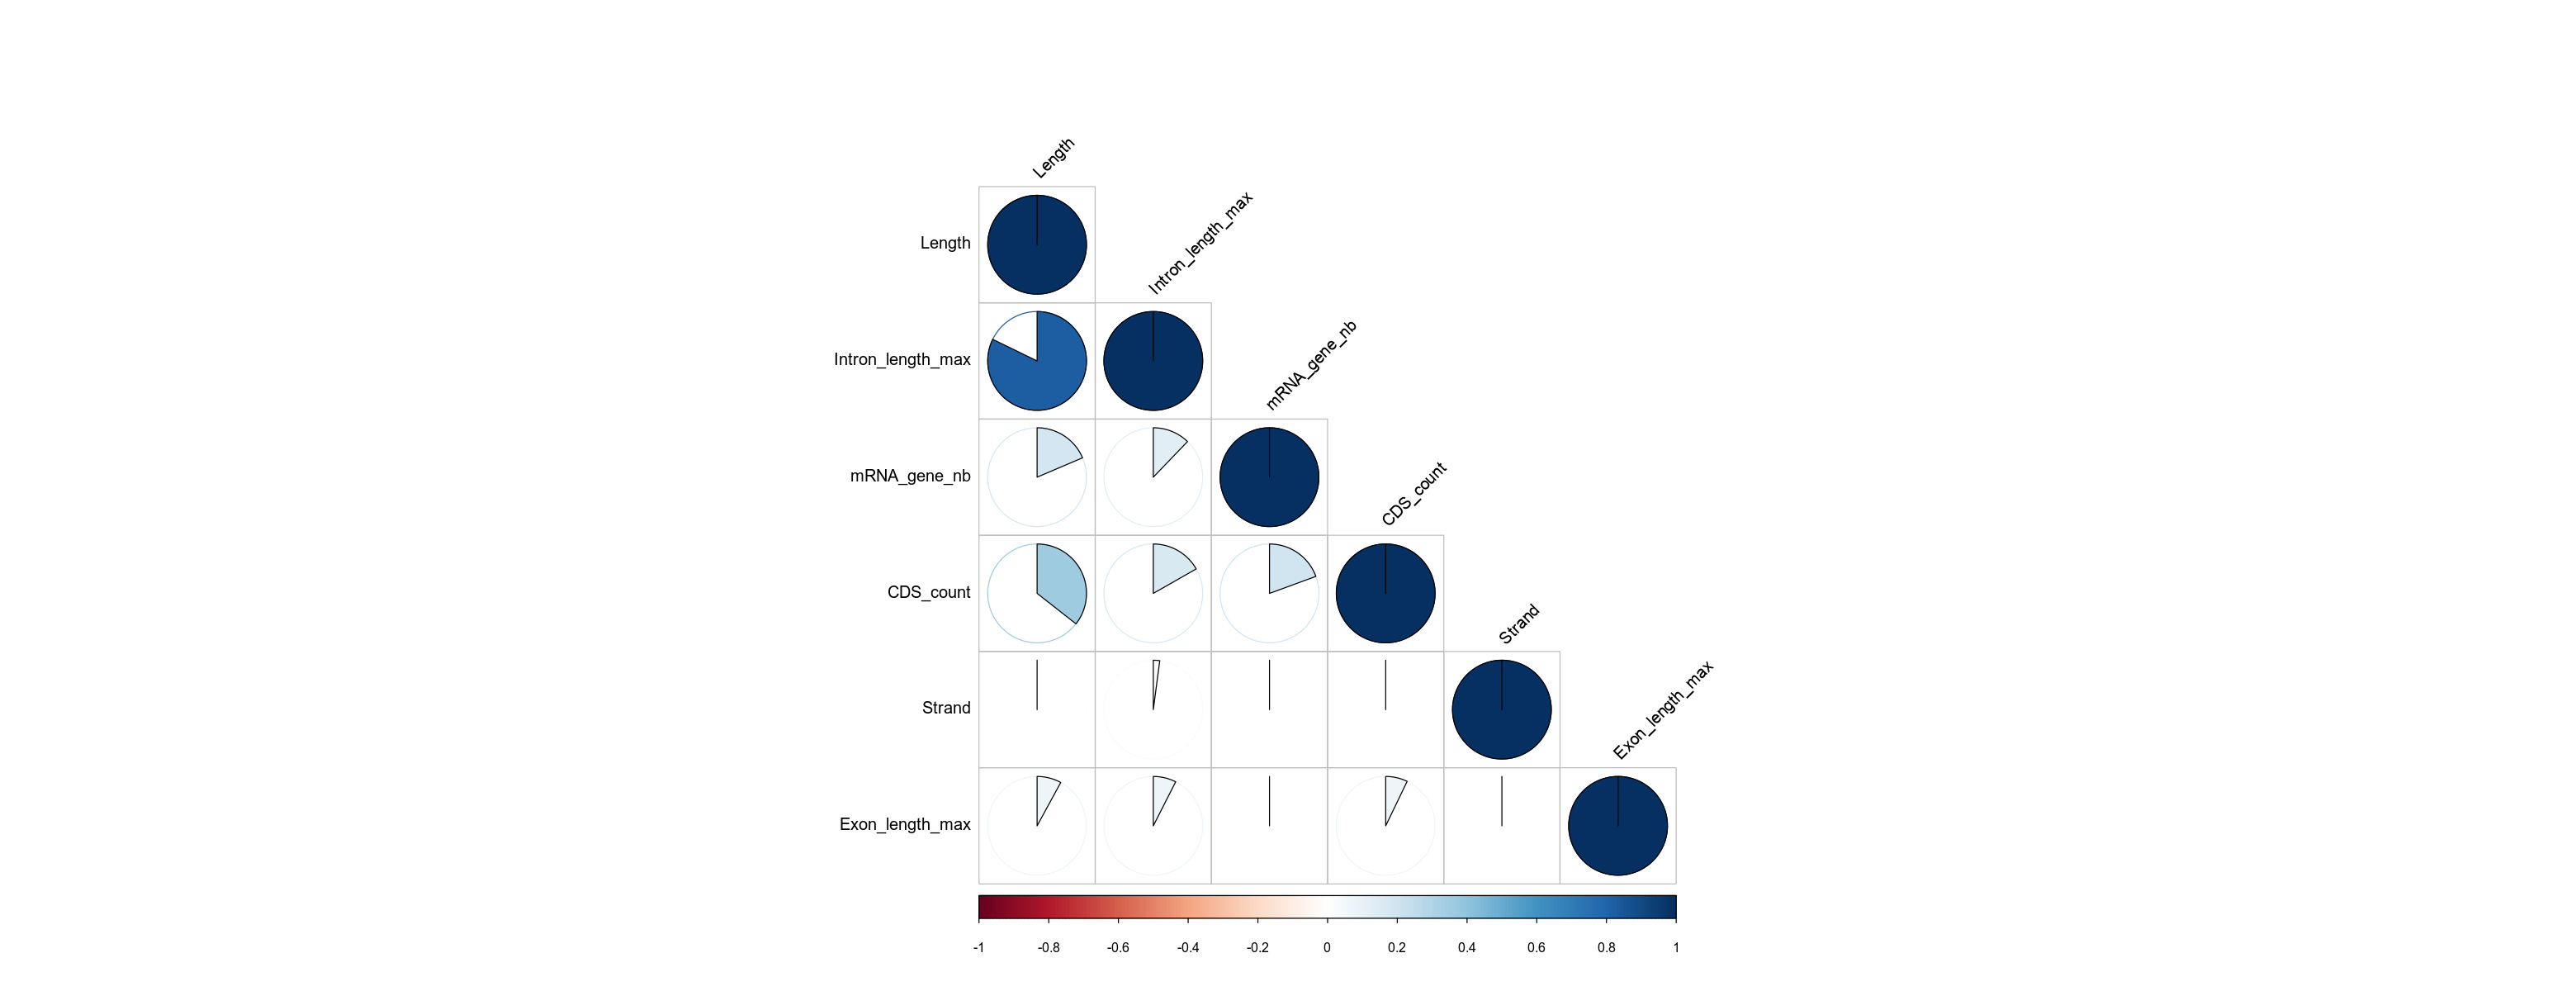

In [278]:
data <- read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_matrix_correlation.parquet')
data$Gene_size_type <- cut(data$CDS_count, breaks=c(0,14,21,max(data$CDS_count)), labels=c('Small', 'Medium', 'Large'))
# data

data2 <- select(data, c('Length','Intron_length_max','mRNA_gene_nb','CDS_count','Strand','Exon_length_max'))
rownames(data2) <- data$Gene
cor(data2)
corrplot(cor(data2), method='pie', type="lower", order="hclust", tl.col="black", tl.srt=45)

In [ ]:
library(ggpubr)
library(rstatix)
library(plyr)

data <- read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_matrix_correlation.parquet')
data$Gene_size_type <- cut(data$CDS_count, breaks=c(0,14,21,max(data$CDS_count)), labels=c('Small', 'Medium', 'Large'))


stat.test <- data %>%
  group_by(Gene_size_type) %>%
  t_test(Intron_length_max ~ Miso_siso) %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")
stat.test

stat.test2 <- data %>%
  t_test(Intron_length_max ~ Gene_size_type, p.adjust.method = "bonferroni")


p_meds <- ddply(data, .(Gene_size_type), summarise, med = median(Intron_length_max))


bxp <- ggplot(data, aes(x=Gene_size_type, y=Intron_length_max, color=Miso_siso)) + 
    geom_boxplot( outlier.shape = NA)


# Ajouter les p-values de `stat.test` and `stat.test2`
# 1. Ajouter stat.test
stat.test <- stat.test %>%
  add_xy_position(x = "Gene_size_type", dodge = 0.8)
k = 100
stat.test$y.position <- stat.test$y.position / k
stat.test
bxp.complex <- bxp + stat_pvalue_manual(
  stat.test,  label = "p.adj.signif", tip.length = 0
  )
# 2. Ajouter stat.test2
# Ajoutez de l'espace entre crochets en utilisant `step.increase` 
stat.test2 <- stat.test2 %>% add_xy_position(x = "Gene_size_type")
stat.test2$y.position <- stat.test2$y.position / k
stat.test2
bxp.complex <- bxp.complex + 
  stat_pvalue_manual(
    stat.test2,  label = "p.adj.signif", tip.length = 0.00,
    step.increase = 0.05
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.1)))  +
 ylim(0,200) 

bxp +  ylim(0,40) 

,Gene_size_type,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Small,Intron_length_max,Miso,Siso,6937,5435,6.753122,12297.706,1.51e-11,4.530e-11,****
2,Medium,Intron_length_max,Miso,Siso,2002,617,4.020568,1510.769,6.09e-05,1.827e-04,***
3,Large,Intron_length_max,Miso,Siso,1660,628,3.339462,1327.452,8.63e-04,2.589e-03,**


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing non-finite values (stat_regline_equation).”
Warning message:
“Removed 1 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


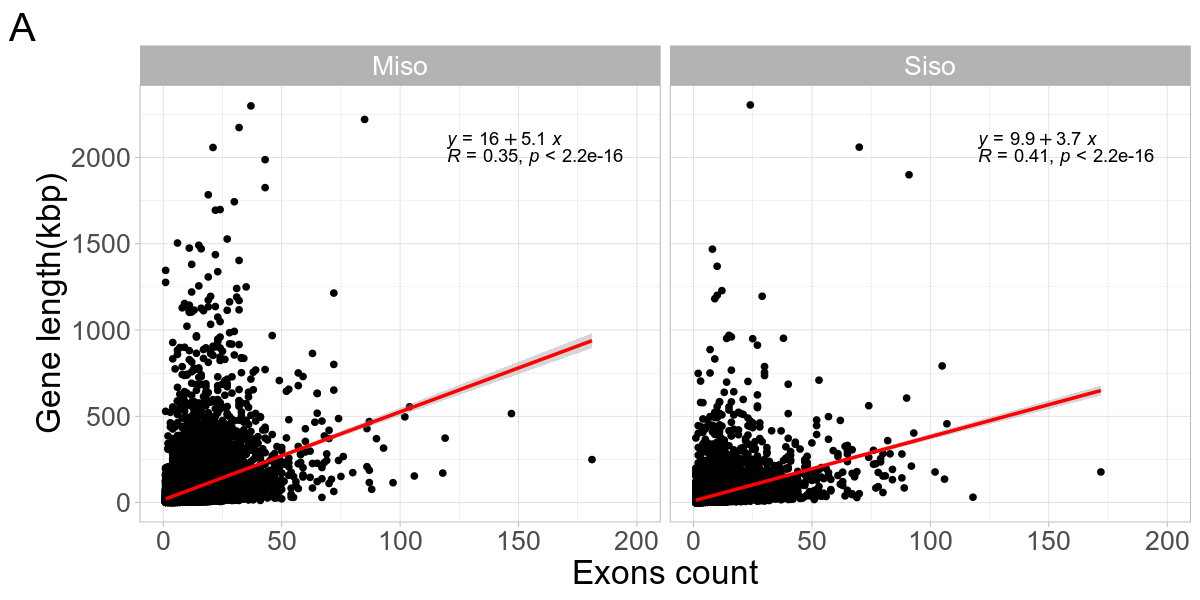

In [284]:
data = read_excel('/gstock/EXOTIC/data/GENOMICS/genes_length_exoncount.xlsx')
# data <- head(data, 50)
# data
# data


w = 10
h = 5

options(repr.plot.width=w, repr.plot.height=h)

ggplot(data, aes(x=Exon_count, y=Length)) + 
    geom_point() + 
    stat_smooth(method = "lm", col = "red") +  
    stat_regline_equation(label.x = 120, label.y = 2100) + 
    stat_cor(label.x = 120, label.y = 2000) + 
    facet_grid(. ~ Miso_siso) + 
    theme_light() + 
    theme(text = element_text(size=20)) + 
    labs(y="Gene length(kbp)", x="Exons count", tag = "A") + xlim(0,200)

    
# p <- ggplot(data, aes(Exon_count, Length)) + geom_point() 
# ggscatter(data, x = "Exon_count", y = "Length", color="Miso_siso"
#           add = "reg.line", conf.int = TRUE, 
#           cor.coef = TRUE, cor.method = "pearson",
#           xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)"
#          ) + 
#     stat_smooth(aes(fill = Miso_siso), method = "lm") +  
#     stat_regline_equation(aes(fill = Miso_siso), label.x = 300, label.y = 2100) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~"), fill = Miso_siso), label.x = 300, label.y = 2000)
#     xlim(0,100) + ylim(0,1000)
# p

Warning message:
“Removed 18 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”


TableGrob (13 x 11) "layout": 19 grobs
    z         cells       name                                           grob
1   0 ( 1-13, 1-11) background               rect[plot.background..rect.1199]
2   1 ( 8- 8, 5- 5)  panel-1-1                      gTree[panel-1.gTree.1135]
3   1 ( 8- 8, 7- 7)  panel-1-2                      gTree[panel-2.gTree.1151]
4   3 ( 6- 6, 5- 5)   axis-t-1                                 zeroGrob[NULL]
5   3 ( 6- 6, 7- 7)   axis-t-2                                 zeroGrob[NULL]
6   3 ( 9- 9, 5- 5)   axis-b-1           absoluteGrob[GRID.absoluteGrob.1155]
7   3 ( 9- 9, 7- 7)   axis-b-2           absoluteGrob[GRID.absoluteGrob.1159]
8   3 ( 8- 8, 4- 4)   axis-l-1           absoluteGrob[GRID.absoluteGrob.1163]
9   3 ( 8- 8, 8- 8)   axis-r-1                                 zeroGrob[NULL]
10  2 ( 7- 7, 5- 5)  strip-t-1                                  gtable[strip]
11  2 ( 7- 7, 7- 7)  strip-t-2                                  gtable[strip]
12  4 ( 5- 5, 5- 7)     x

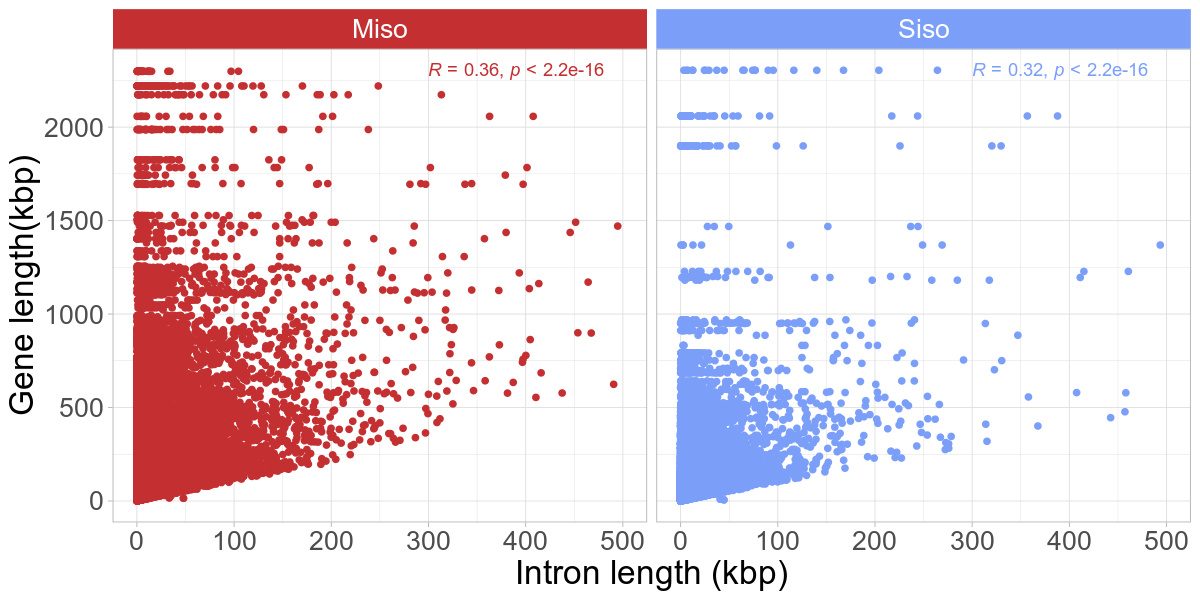

In [37]:
library(arrow)
data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet')
# data <- data[data$Intron_nb <= 10, ]
data = data[(data$Introns_lengths > 0), ]

# data <- head(data, 50)
# data
# data


w = 10
h = 5

options(repr.plot.width=w, repr.plot.height=h)

p <- ggplot(data, aes(x=Introns_lengths, y=Length, color=Miso_siso)) + 
    geom_point() + 
#     stat_smooth(method = "lm", col = "red") +  
#     stat_regline_equation(label.x = 320, label.y = 2300) + 
    stat_cor(label.x = 300, label.y = 2300) + 
    facet_grid(. ~ Miso_siso) + 
    theme_light() + 
    theme(text = element_text(size=20), legend.position="none") + 
    labs(y="Gene length(kbp)", x="Intron length (kbp)") + xlim(0,500) + scale_colour_manual(values = c("#C43032", "#7B9FF9"))

g <- ggplot_gtable(ggplot_build(p))
stripr <- which(grepl('strip-', g$layout$name))
# palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

fills <- c("#C43032", "#7B9FF9", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey")
k <- 1
for (i in stripr) {
    j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
    g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
    k <- k+1
}
grid.draw(g)
g    
# p <- ggplot(data, aes(Exon_count, Length)) + geom_point() 
# ggscatter(data, x = "Exon_count", y = "Length", color="Miso_siso"
#           add = "reg.line", conf.int = TRUE, 
#           cor.coef = TRUE, cor.method = "pearson",
#           xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)"
#          ) + 
#     stat_smooth(aes(fill = Miso_siso), method = "lm") +  
#     stat_regline_equation(aes(fill = Miso_siso), label.x = 300, label.y = 2100) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~"), fill = Miso_siso), label.x = 300, label.y = 2000)
#     xlim(0,100) + ylim(0,1000)
# p

Warning message:
“package ‘ggpubr’ was built under R version 4.0.5”
Warning message:
“Removed 18 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”


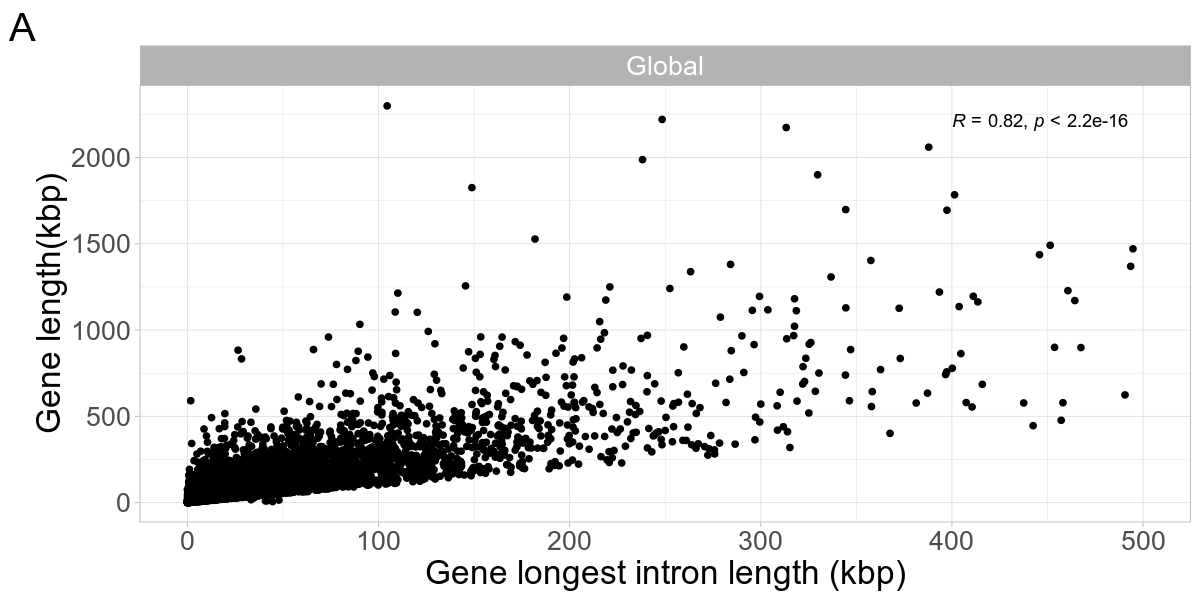

In [24]:
library(arrow)
library(ggplot2)
library(ggpubr)
data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlengthmax.parquet')
# data <- data[data$Intron_nb <= 10, ]
data = data[(data$Intron_length_max > 0), ]
data$cat <- "Global"

# data <- head(data, 50)
# data
# data


w = 10
h = 5

options(repr.plot.width=w, repr.plot.height=h)

ggplot(data, aes(x=Intron_length_max, y=Length)) + 
    geom_point() + 
#     stat_smooth(method = "lm", col = "red") +  
#     stat_regline_equation(label.x = 320, label.y = 2300) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), label.x = 320, label.y = 2200) + 
    stat_cor(label.x = 400, label.y = 2200) + 
    facet_grid(. ~ cat) + 
    theme_light() + 
    theme(text = element_text(size=20)) + 
    labs(y="Gene length(kbp)", x="Gene longest intron length (kbp)", tag = "A") + xlim(0,500)

    
# p <- ggplot(data, aes(Exon_count, Length)) + geom_point() 
# ggscatter(data, x = "Exon_count", y = "Length", color="Miso_siso"
#           add = "reg.line", conf.int = TRUE, 
#           cor.coef = TRUE, cor.method = "pearson",
#           xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)"
#          ) + 
#     stat_smooth(aes(fill = Miso_siso), method = "lm") +  
#     stat_regline_equation(aes(fill = Miso_siso), label.x = 300, label.y = 2100) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~"), fill = Miso_siso), label.x = 300, label.y = 2000)
#     xlim(0,100) + ylim(0,1000)
# p

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

Warning message:
“package ‘readr’ was built under R version 4.0.5”
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please

TableGrob (13 x 11) "layout": 19 grobs
    z         cells       name                                          grob
1   0 ( 1-13, 1-11) background               rect[plot.background..rect.897]
2   1 ( 8- 8, 5- 5)  panel-1-1                      gTree[panel-1.gTree.831]
3   1 ( 8- 8, 7- 7)  panel-1-2                      gTree[panel-2.gTree.847]
4   3 ( 6- 6, 5- 5)   axis-t-1                                zeroGrob[NULL]
5   3 ( 6- 6, 7- 7)   axis-t-2                                zeroGrob[NULL]
6   3 ( 9- 9, 5- 5)   axis-b-1           absoluteGrob[GRID.absoluteGrob.851]
7   3 ( 9- 9, 7- 7)   axis-b-2           absoluteGrob[GRID.absoluteGrob.855]
8   3 ( 8- 8, 4- 4)   axis-l-1           absoluteGrob[GRID.absoluteGrob.859]
9   3 ( 8- 8, 8- 8)   axis-r-1                                zeroGrob[NULL]
10  2 ( 7- 7, 5- 5)  strip-t-1                                 gtable[strip]
11  2 ( 7- 7, 7- 7)  strip-t-2                                 gtable[strip]
12  4 ( 5- 5, 5- 7)     xlab-t       

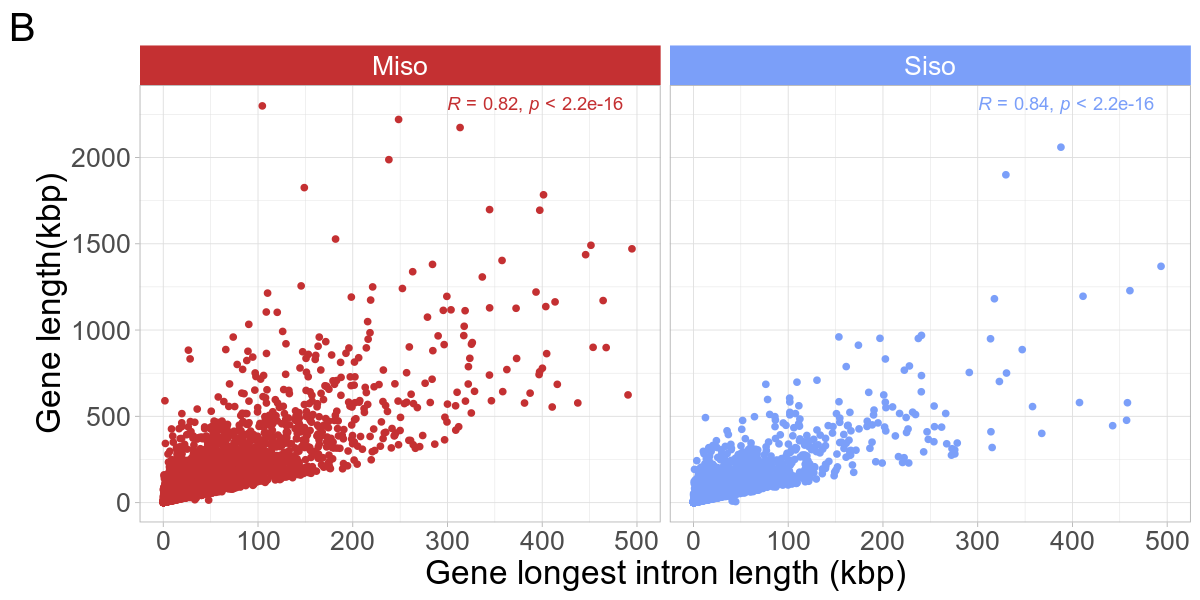

In [33]:
library(arrow)
library(tidyverse)
library(grid)
library(ggpubr)
library(rstatix)
library(plyr)
data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlengthmax.parquet')
# data <- data[data$Intron_nb <= 10, ]
data = data[(data$Intron_length_max > 0), ]
data$cat <- "Global"

# data <- head(data, 50)
# data
# data


w = 10
h = 5

options(repr.plot.width=w, repr.plot.height=h)

p <- ggplot(data, aes(x=Intron_length_max, y=Length, color=Miso_siso)) + 
    geom_point() + 
#     stat_smooth(method = "lm", col = "red") +  
#     stat_regline_equation(label.x = 320, label.y = 2300) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), label.x = 320, label.y = 2200) + 
    stat_cor(label.x = 300, label.y = 2300) + 
    facet_grid(. ~ Miso_siso) + 
    theme_light() + 
    theme(text = element_text(size=20), legend.position="none",) + 
    labs(y="Gene length(kbp)", x="Gene longest intron length (kbp)", tag = "B") + xlim(0,500) + scale_colour_manual(values = c("#C43032", "#7B9FF9"))

g <- ggplot_gtable(ggplot_build(p))
stripr <- which(grepl('strip-', g$layout$name))
# palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

fills <- c("#C43032", "#7B9FF9", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey")
k <- 1
for (i in stripr) {
    j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
    g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
    k <- k+1
}
grid.draw(g)
g
# p <- ggplot(data, aes(Exon_count, Length)) + geom_point() 
# ggscatter(data, x = "Exon_count", y = "Length", color="Miso_siso"
#           add = "reg.line", conf.int = TRUE, 
#           cor.coef = TRUE, cor.method = "pearson",
#           xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)"
#          ) + 
#     stat_smooth(aes(fill = Miso_siso), method = "lm") +  
#     stat_regline_equation(aes(fill = Miso_siso), label.x = 300, label.y = 2100) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~"), fill = Miso_siso), label.x = 300, label.y = 2000)
#     xlim(0,100) + ylim(0,1000)
# p

Warning message:
“Removed 17 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”


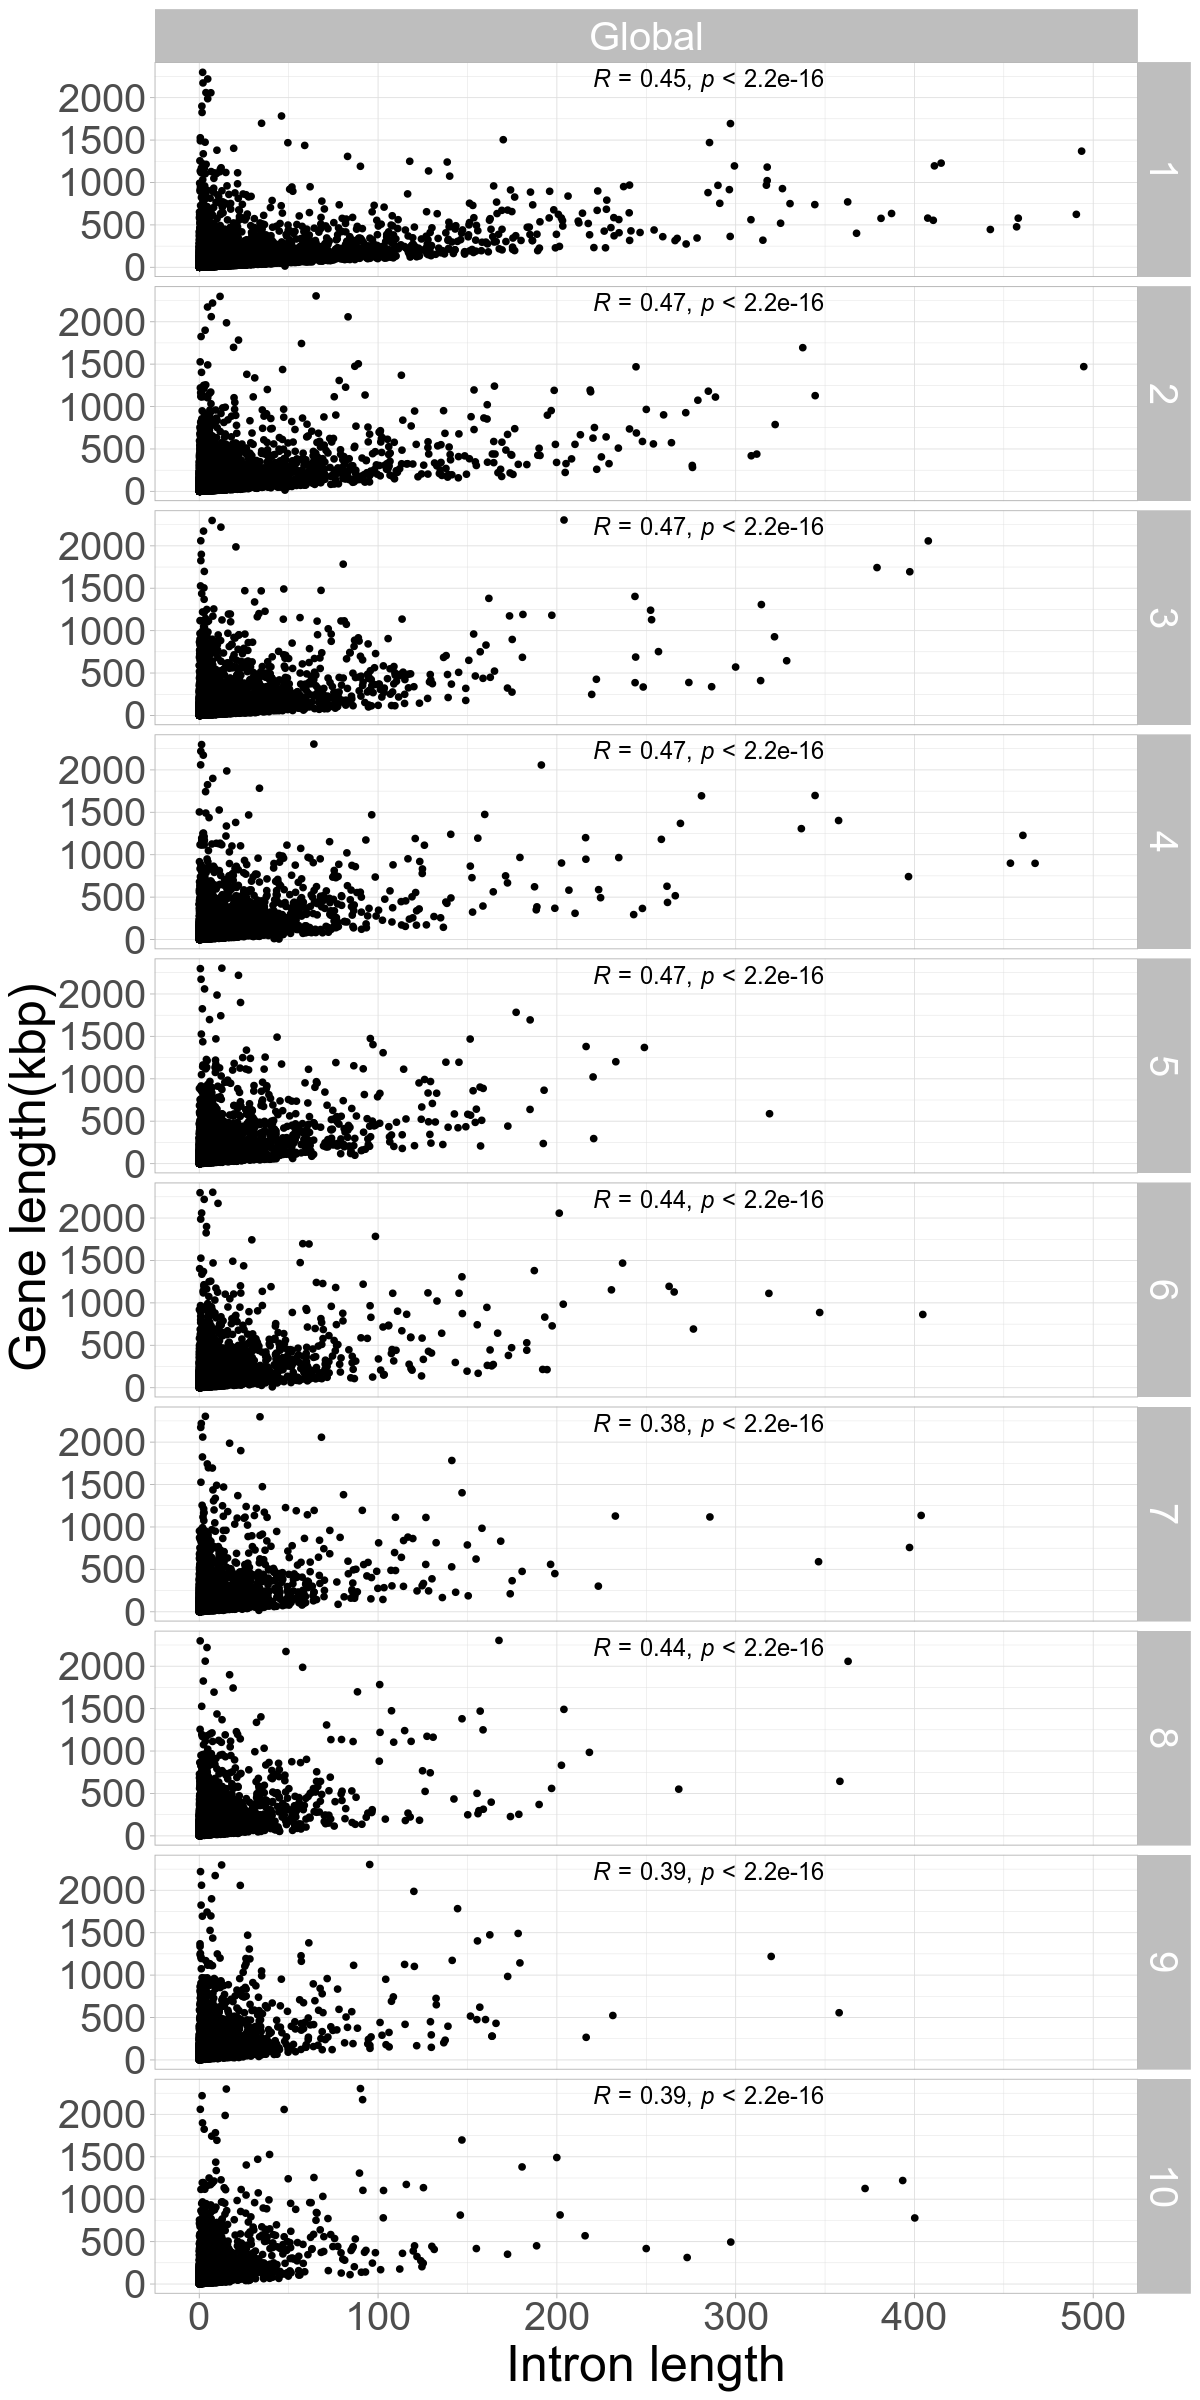

In [17]:
library(arrow)
library(tidyverse)
library(grid)
library(ggpubr)
library(rstatix)
library(plyr)

data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet')
data <- data[data$Intron_nb <= 10, ]
data = data[(data$Introns_lengths > 0) & (data$Introns_lengths < 2e6), ]
data$cat <- "Global"

# data <- head(data, 50)
# data
# data


w = 10
h = 20

options(repr.plot.width=w, repr.plot.height=h)

p <- ggplot(data, aes(x=Introns_lengths, y=Length)) + 
    geom_point() + 
#     stat_smooth(method = "lm", col = "red") +  
#     stat_regline_equation(label.x = 220, label.y = 2200, size = 5) + 
    stat_cor(label.x = 220, label.y = 2200, size = 5) + 
    facet_grid(Intron_nb ~ cat) + 
    theme_light() + 
    theme(text = element_text(size=30), legend.position="none", strip.background = element_rect(fill="grey")) + 
    labs(y="Gene length(kbp)", x="Intron length") + xlim(0,500)

p
# g <- ggplot_gtable(ggplot_build(p))
# stripr <- which(grepl('strip-', g$layout$name))
# # palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

# fills <- c("#C43032", "#7B9FF9", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey")
# k <- 1
# for (i in stripr) {
#     j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
#     g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
#     k <- k+1
# }
# grid.draw(g)
# g

# stripr <- which(grepl('strip-r', g$layout$name))
# fills <- c("red","green")
# k <- 1
# for (i in stripr) {
#   j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
#   g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
#   k <- k+1
# }
# grid::grid.draw(g)


# p <- ggplot(data, aes(Exon_count, Length)) + geom_point() 
# ggscatter(data, x = "Exon_count", y = "Length", color="Miso_siso"
#           add = "reg.line", conf.int = TRUE, 
#           cor.coef = TRUE, cor.method = "pearson",
#           xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)"
#          ) + 
#     stat_smooth(aes(fill = Miso_siso), method = "lm") +  
#     stat_regline_equation(aes(fill = Miso_siso), label.x = 300, label.y = 2100) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~"), fill = Miso_siso), label.x = 300, label.y = 2000)
#     xlim(0,100) + ylim(0,1000)
# p

Warning message:
“Removed 17 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”


TableGrob (31 x 12) "layout": 65 grobs
    z         cells       name                                           grob
1   0 ( 1-31, 1-12) background               rect[plot.background..rect.6853]
2   1 ( 8- 8, 5- 5)  panel-1-1                      gTree[panel-1.gTree.6361]
3   1 (10-10, 5- 5)  panel-2-1                      gTree[panel-3.gTree.6393]
4   1 (12-12, 5- 5)  panel-3-1                      gTree[panel-5.gTree.6425]
5   1 (14-14, 5- 5)  panel-4-1                      gTree[panel-7.gTree.6457]
6   1 (16-16, 5- 5)  panel-5-1                      gTree[panel-9.gTree.6489]
7   1 (18-18, 5- 5)  panel-6-1                     gTree[panel-11.gTree.6521]
8   1 (20-20, 5- 5)  panel-7-1                     gTree[panel-13.gTree.6553]
9   1 (22-22, 5- 5)  panel-8-1                     gTree[panel-15.gTree.6585]
10  1 (24-24, 5- 5)  panel-9-1                     gTree[panel-17.gTree.6617]
11  1 (26-26, 5- 5) panel-10-1                     gTree[panel-19.gTree.6649]
12  1 ( 8- 8, 7- 7)  pane

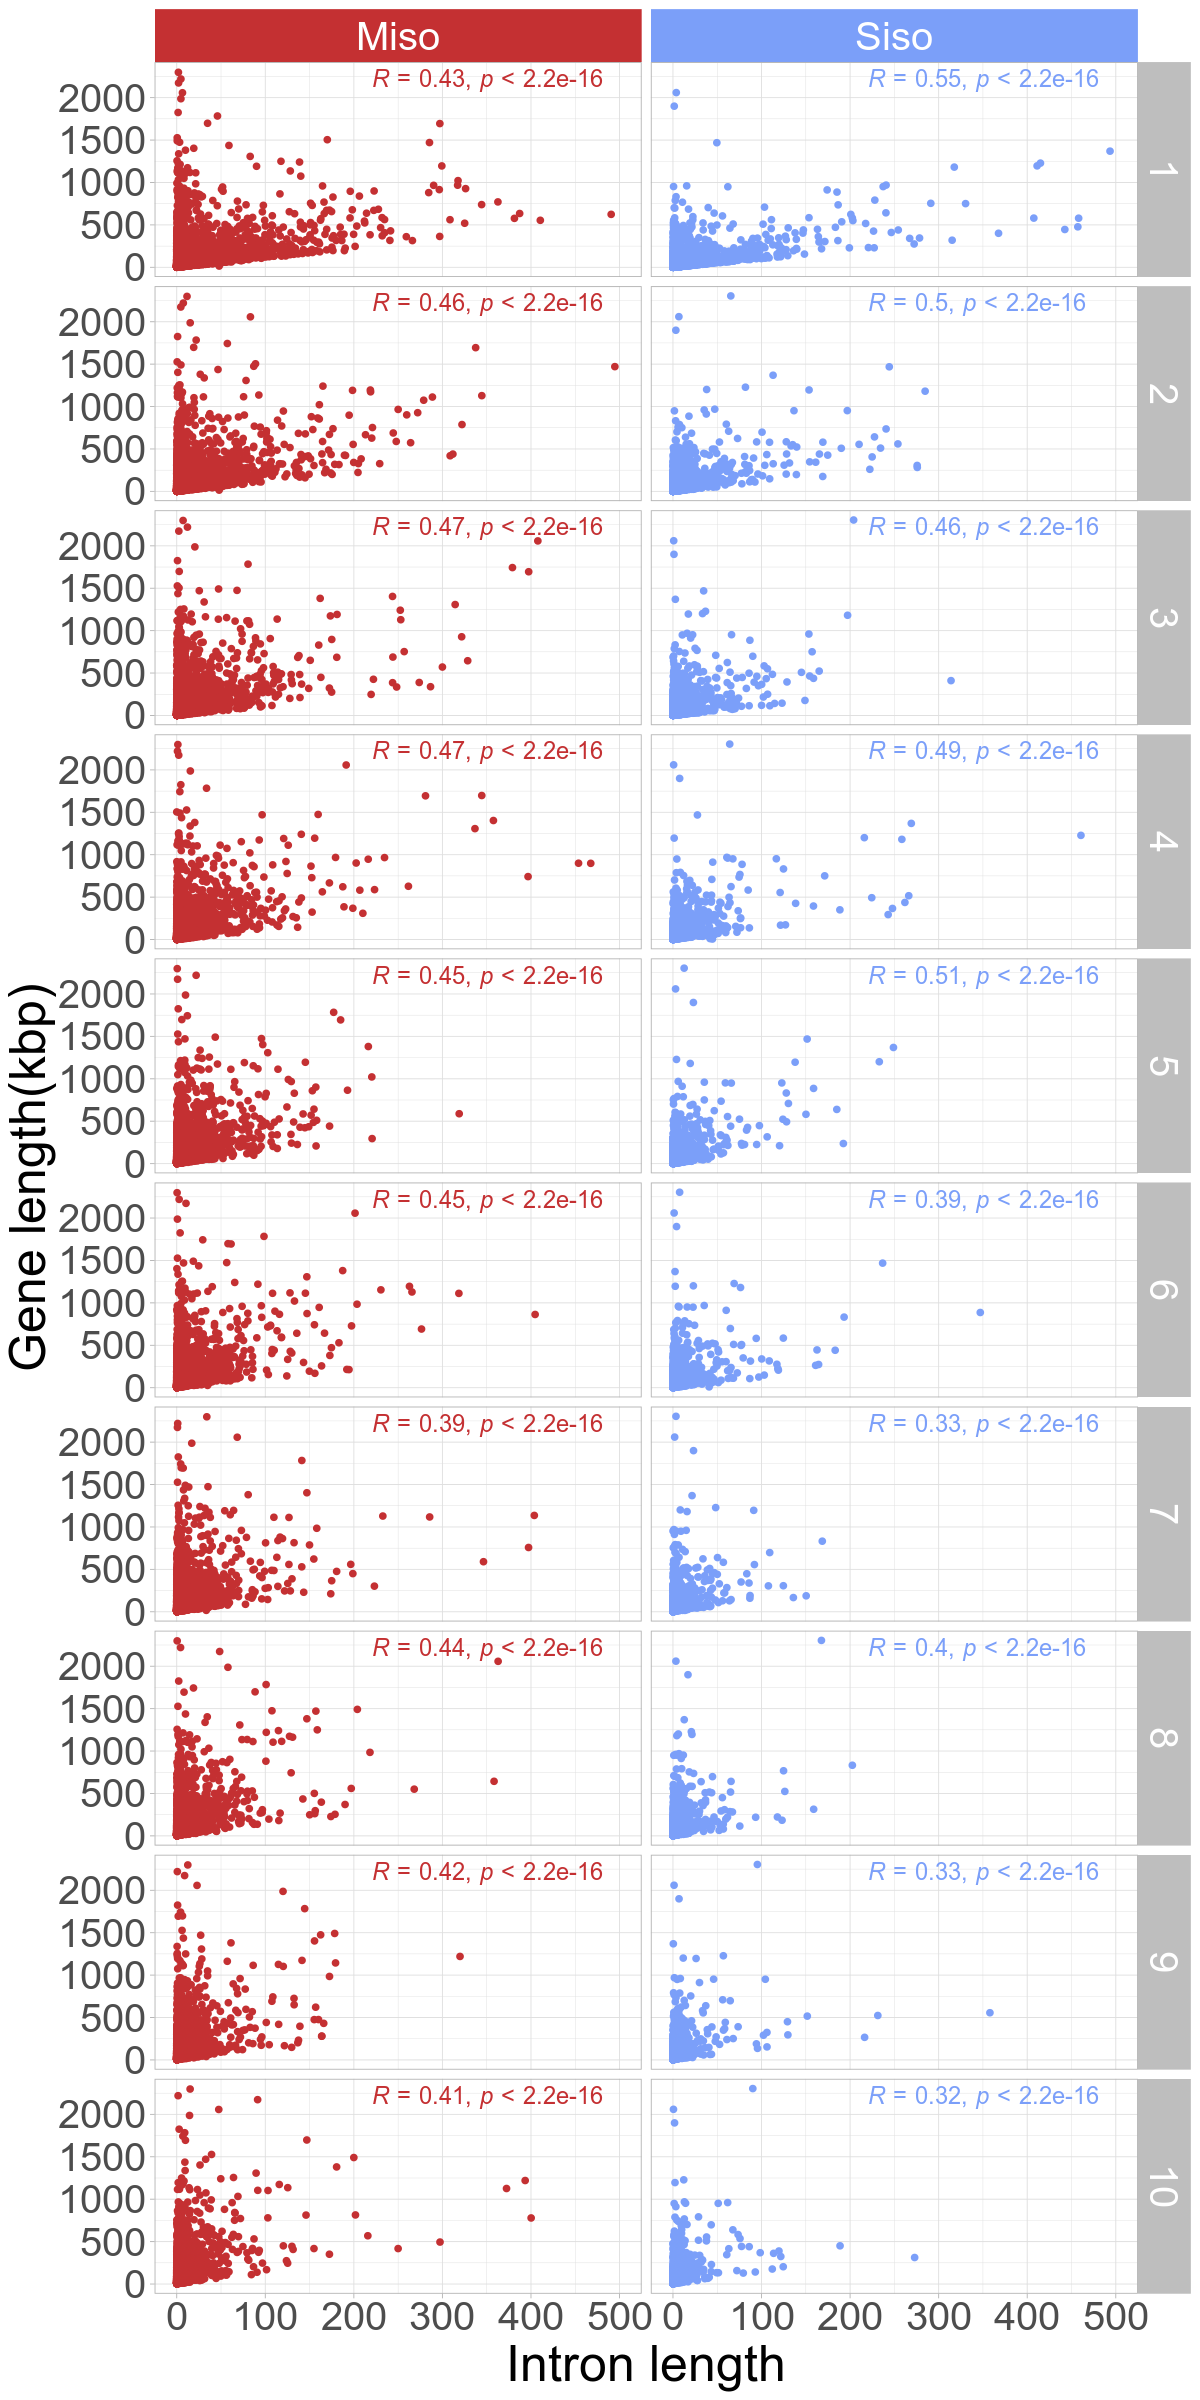

In [12]:
library(arrow)
library(tidyverse)
library(grid)
library(ggpubr)
library(rstatix)
library(plyr)

data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet')
data <- data[data$Intron_nb <= 10, ]
data = data[(data$Introns_lengths > 0) & (data$Introns_lengths < 2e6), ]

# data <- head(data, 50)
# data
# data


w = 10
h = 20

options(repr.plot.width=w, repr.plot.height=h)

p <- ggplot(data, aes(x=Introns_lengths, y=Length, color=Miso_siso)) + 
    geom_point() + 
#     stat_smooth(method = "lm", col = "red") +  
#     stat_regline_equation(label.x = 220, label.y = 2200, size = 5) + 
    stat_cor(label.x = 220, label.y = 2200, size = 5) + 
    facet_grid(Intron_nb ~ Miso_siso) + 
    theme_light() + 
    theme(text = element_text(size=30), legend.position="none") + 
    labs(y="Gene length(kbp)", x="Intron length") + xlim(0,500) + scale_colour_manual(values = c("#C43032", "#7B9FF9"))

g <- ggplot_gtable(ggplot_build(p))
stripr <- which(grepl('strip-', g$layout$name))
# palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

fills <- c("#C43032", "#7B9FF9", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey")
k <- 1
for (i in stripr) {
    j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
    g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
    k <- k+1
}
grid.draw(g)
g

# stripr <- which(grepl('strip-r', g$layout$name))
# fills <- c("red","green")
# k <- 1
# for (i in stripr) {
#   j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
#   g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
#   k <- k+1
# }
# grid::grid.draw(g)


# p <- ggplot(data, aes(Exon_count, Length)) + geom_point() 
# ggscatter(data, x = "Exon_count", y = "Length", color="Miso_siso"
#           add = "reg.line", conf.int = TRUE, 
#           cor.coef = TRUE, cor.method = "pearson",
#           xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)"
#          ) + 
#     stat_smooth(aes(fill = Miso_siso), method = "lm") +  
#     stat_regline_equation(aes(fill = Miso_siso), label.x = 300, label.y = 2100) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~"), fill = Miso_siso), label.x = 300, label.y = 2000)
#     xlim(0,100) + ylim(0,1000)
# p

Warning message:
“Removed 38557 rows containing non-finite values (stat_boxplot).”


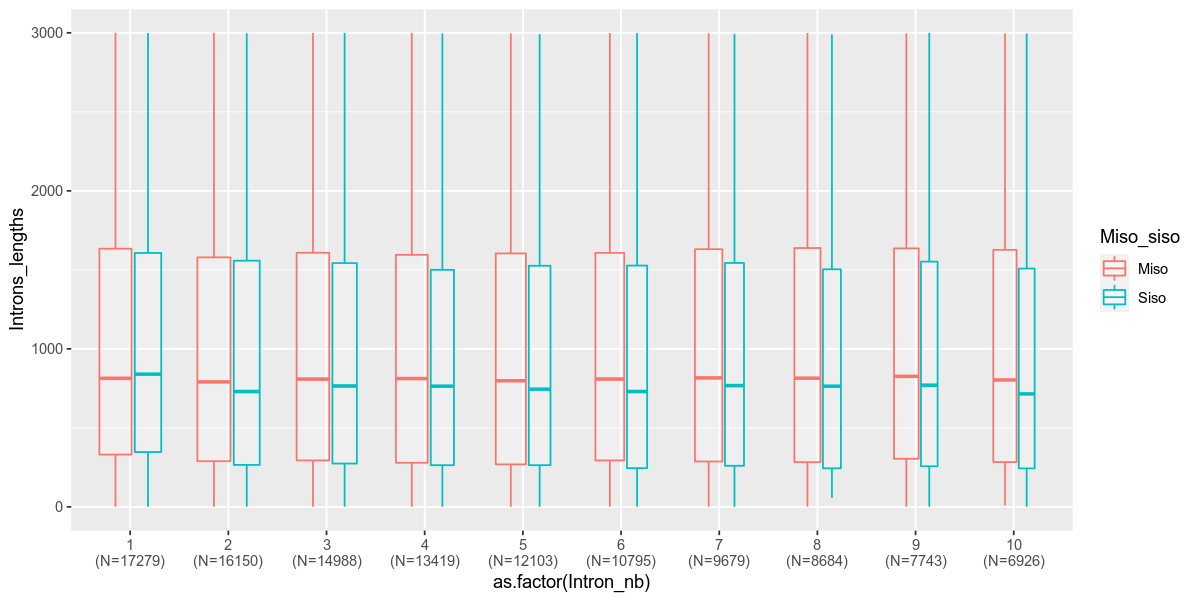

In [128]:
data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet')
data$Introns_lengths <- data$Introns_lengths * 1000
data <- data[data$Intron_nb <= 10, ]

my_xlab <- paste(unique(data$Intron_nb),"\n(N=",table(data$Intron_nb),")",sep="")

# plot
ggplot(data, aes(x=as.factor(Intron_nb), y=Introns_lengths, color=Miso_siso)) +
    geom_boxplot(varwidth = TRUE, alpha=0.2, outlier.shape = NA) +
#     theme(legend.position="none") +
    scale_x_discrete(labels=my_xlab) + 
    ylim(0,3000)

# raincloud_1_h <- raincloud_1x1(
#   data = df_1x1, 
#   colors = (c('dodgerblue','darkorange')), 
#   fills = (c('dodgerblue','darkorange')), 
#   size = 1, 
#   alpha = .6, 
#   ort = 'h') +

# scale_x_continuous(breaks=c(1,2), labels=c("Group1", "Group2"), limits=c(0, 3)) +
#   xlab("Groups") + 
#   ylab("Score") +
#   theme_classic()


Intron_length_max_index,med
<int>,<int>
1,33
2,32
3,30
4,29
5,27
6,26
7,24
8,24
9,24


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”


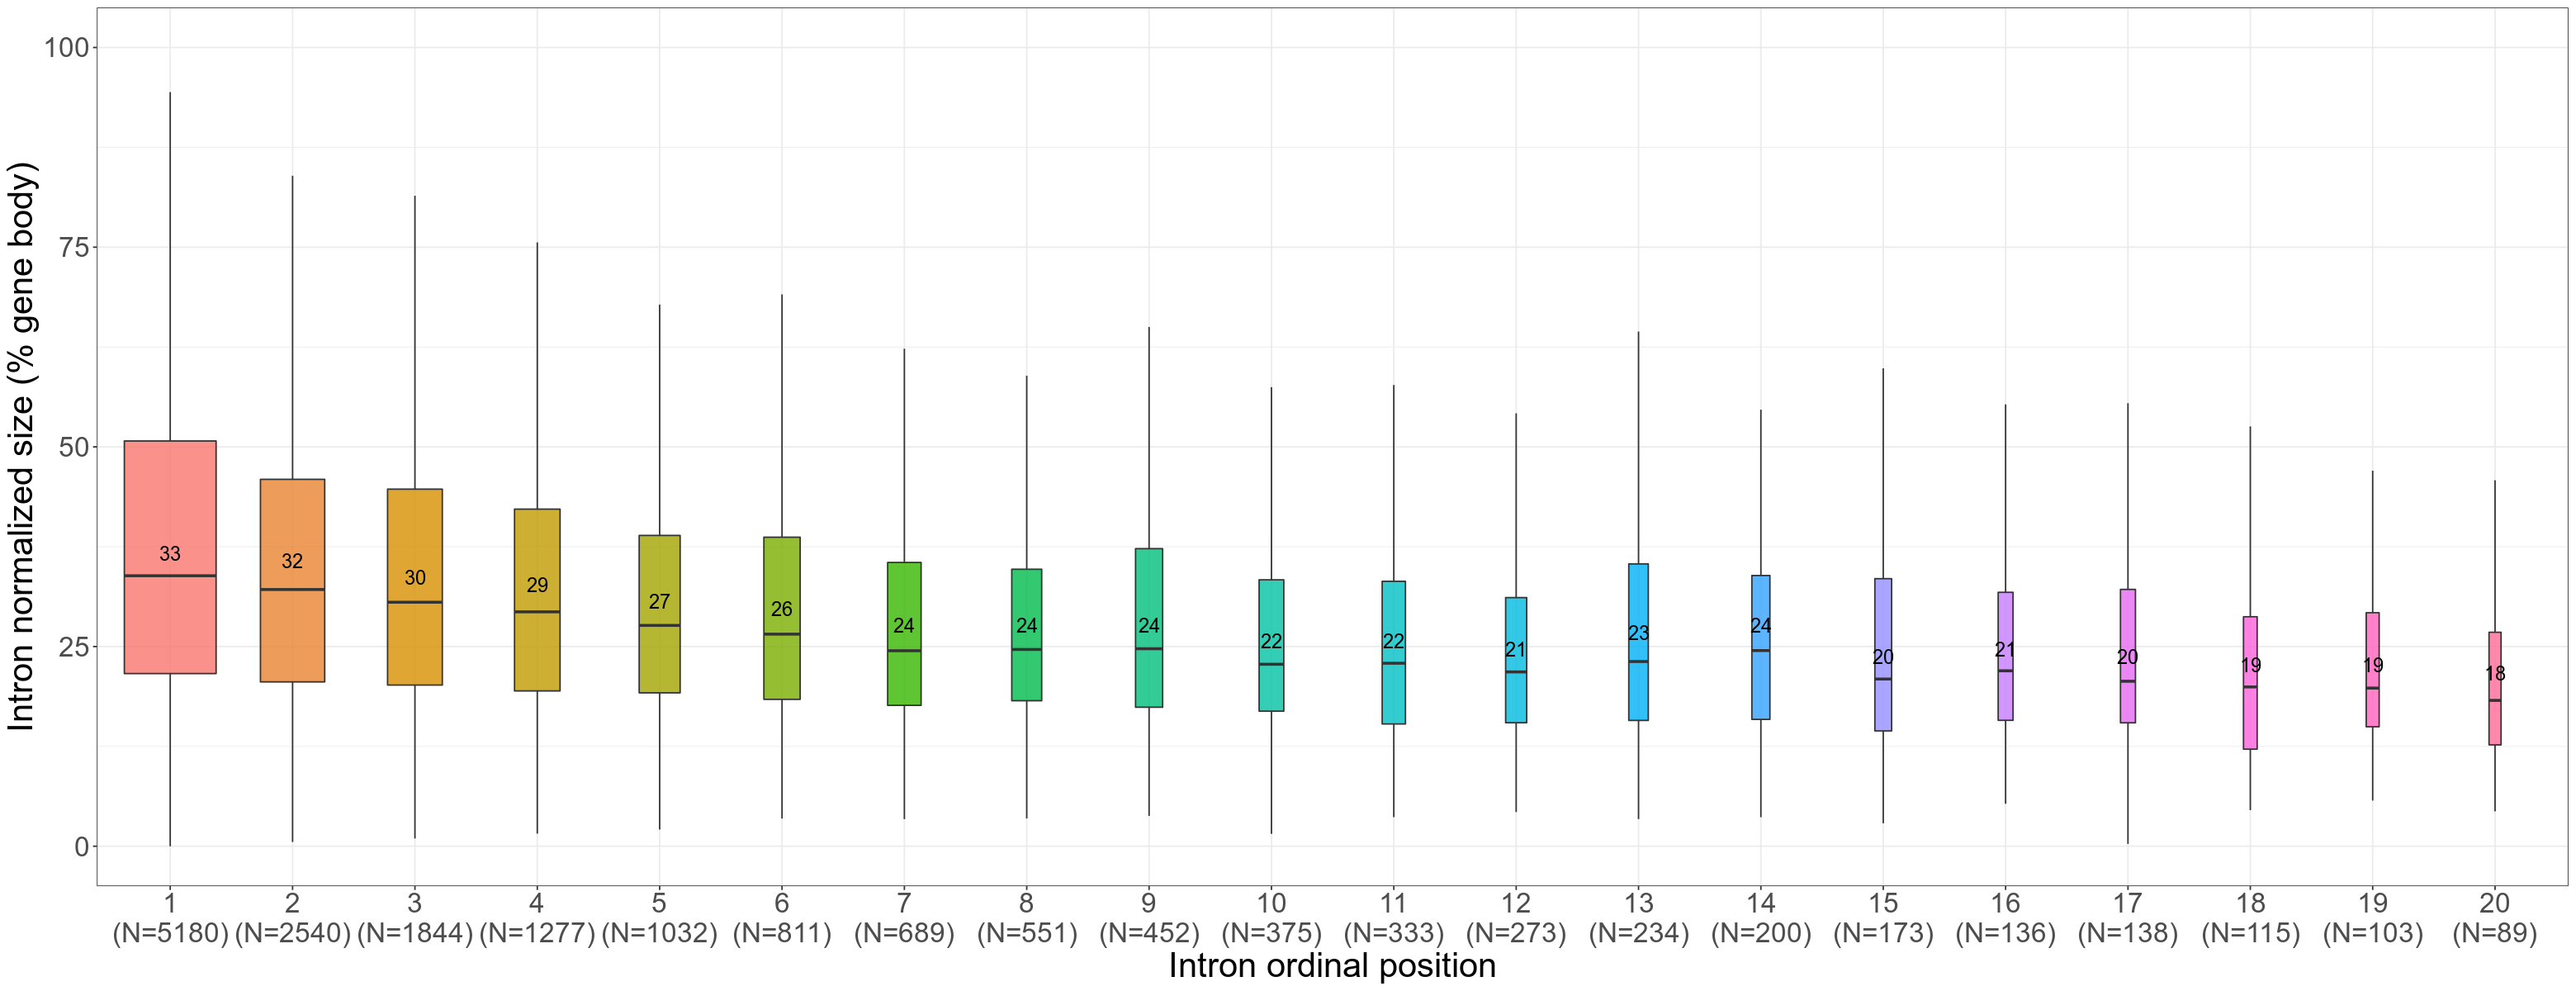

In [277]:

w = 26
h = 10

options(repr.plot.width=w, repr.plot.height=h)

data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlengthmax.parquet')
data$Intron_length_norm <- data$Intron_length_norm * 100 
data$Gene_size_type <- cut(data$CDS_count, breaks=c(0,14,21,max(data$CDS_count)), labels=c('Small', 'Medium', 'Large'))

# data$Introns_lengths <- data$Introns_lengths * 1000
data <- data[data$Intron_length_max_index <= 20, ]
data <- data[order(data$Intron_length_max_index),  ]
# data <- head(data, 20)
# data

my_xlab <- paste(unique(data$Intron_length_max_index),"\n(N=",table(data$Intron_length_max_index),")",sep="")

p_meds <- ddply(data, .(Intron_length_max_index), summarise, med = median(Intron_length_norm))
p_meds$med <- as.integer(p_meds$med)
p_meds

# # plot
ggplot(data, aes(x=as.factor(Intron_length_max_index), y=Intron_length_norm, fill=as.factor(Intron_length_max_index))) +
    geom_boxplot(varwidth=TRUE,  alpha=0.8, outlier.shape = NA) + 
#     geom_line() + 
    geom_text(data = p_meds, aes(x = as.factor(Intron_length_max_index), y = med, label = med), size = 5, vjust = -1.5) +
    ylim(0,100) + theme_bw() +
     theme(text = element_text(size=25), legend.position="none")  +     scale_x_discrete(labels=my_xlab)  +
    xlab("Intron ordinal position") +   ylab("Intron normalized size (% gene body)") 


# #     theme(legend.position="none") +

# # raincloud_1_h <- raincloud_1x1(
# #   data = df_1x1, 
# #   colors = (c('dodgerblue','darkorange')), 
# #   fills = (c('dodgerblue','darkorange')), 
# #   size = 1, 
# #   alpha = .6, 
# #   ort = 'h') +

# # scale_x_continuous(breaks=c(1,2), labels=c("Group1", "Group2"), limits=c(0, 3)) +

